In [1]:
import pandas as pd
import numpy as np

import vitaldb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
tid="https://api.vitaldb.net/trks" # Vital DB Web API
data = pd.read_csv(tid) ##
Allheart = data[data["tname"] == "Solar8000/HR"].reset_index(drop=True)["tid"] ## dataframe of all cases of HR data

In [2]:
HRDATA = [] # Iterates through each case and creates a sperate dataframe for each patient
for i,tid in enumerate(Allheart[0:100]):
    dfi = pd.read_csv(f"https://api.vitaldb.net/{tid}").dropna()
    dfi['id'] = i+1 
    HRDATA.append(dfi)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

rmse_list=[]
def train_and_predict_multiple(dataframes, num_lags):
    global rmse_list 
    for df in dataframes:
        for i in range(1, num_lags + 1):
            df.loc[:, f'Lag_{i}'] = df['Solar8000/HR'].shift(i)
        df.dropna(inplace=True)
        
        # Define features (lagged values) and target
        X = df[[f"Lag_{num_lags}"]]  # Include lagged features
        y = df[['Solar8000/HR']]  # Target variable

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        # Initialize and train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict Solar8000/HR using lagged features
        predictions = model.predict(X_test)

        # Plot actual vs predicted values
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test.index, y_test, label='Actual', color='blue')
        plt.scatter(X_test.index, predictions, label='Predicted', color='red')
        plt.xlabel('Time')
        plt.ylabel('Solar8000/HR')
        plt.title('Actual vs Predicted Solar8000/HR')
        plt.legend()
        plt.show()

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        print("Root Mean Squared Error:", rmse)
        rmse_list.append(rmse)
        
# Example usage:
# train_and_predict_multiple([HR1, HR2, HR3], num_lags=10)


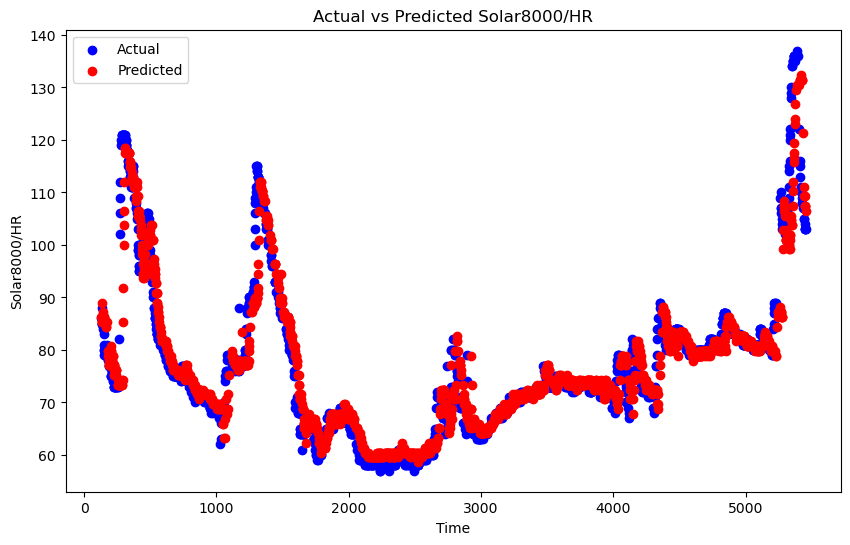

Root Mean Squared Error: 6.004907646671125


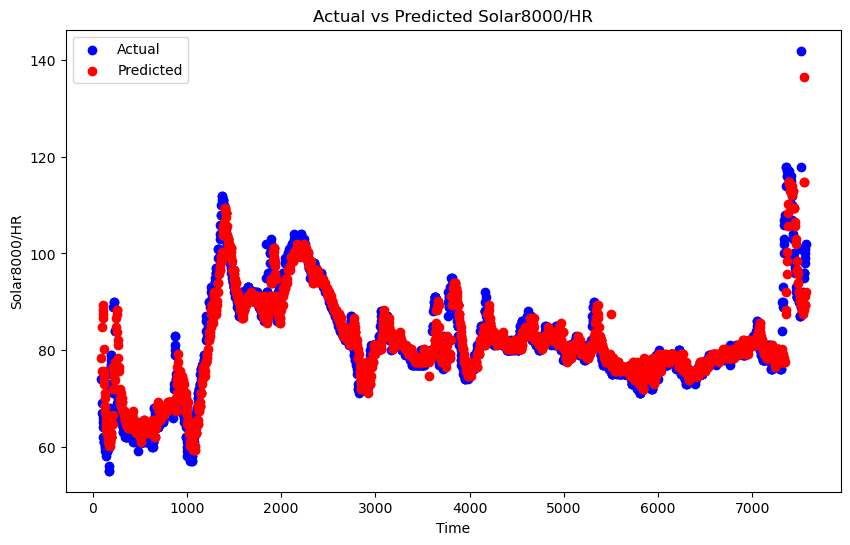

Root Mean Squared Error: 4.344640572032214


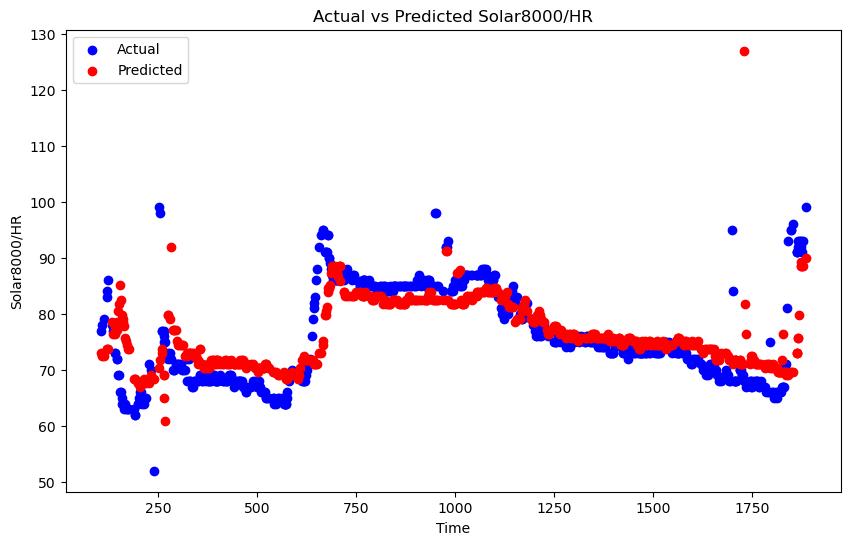

Root Mean Squared Error: 6.298224390689491


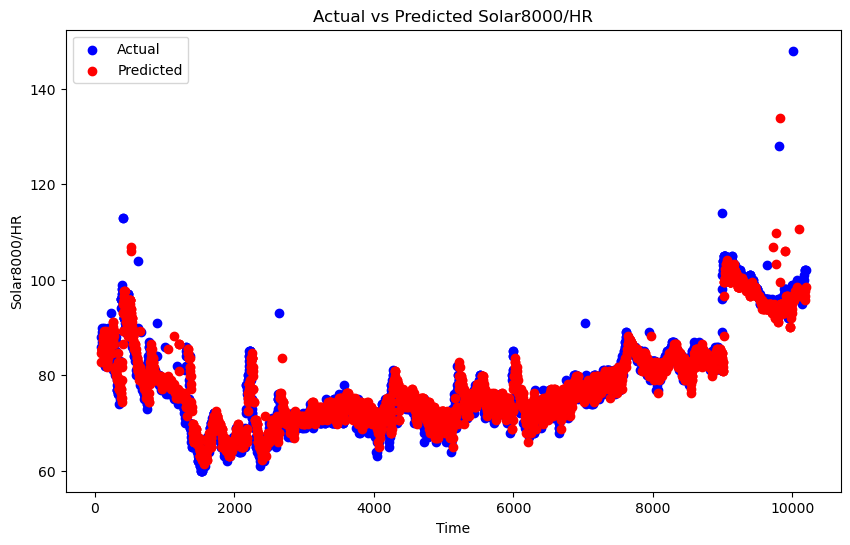

Root Mean Squared Error: 3.6342344971805396


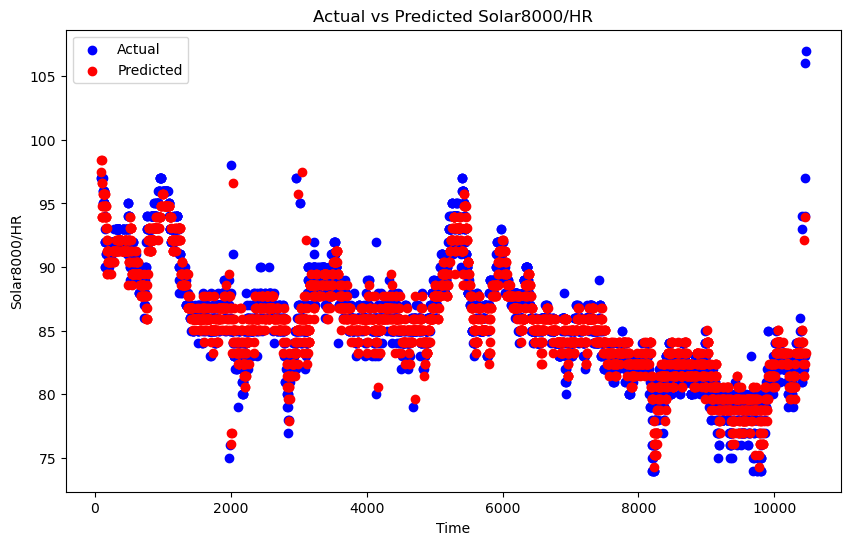

Root Mean Squared Error: 1.9706177312435071


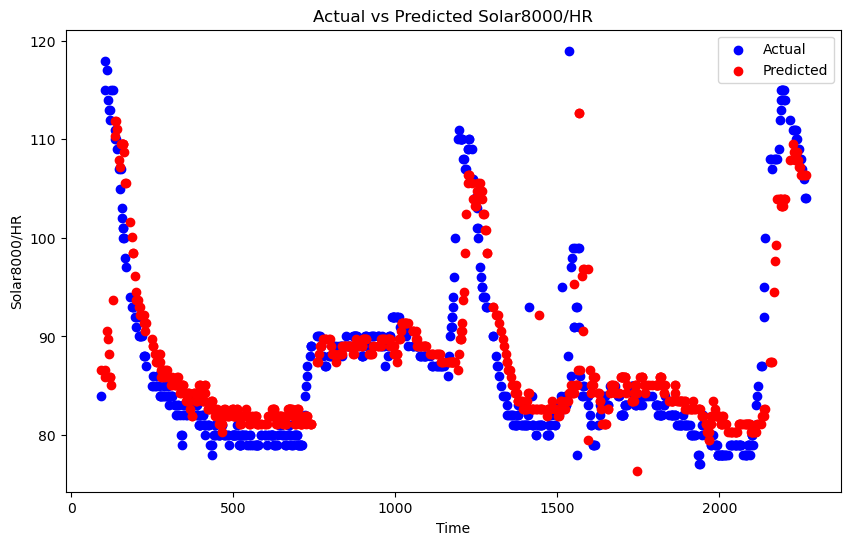

Root Mean Squared Error: 5.712737844011442


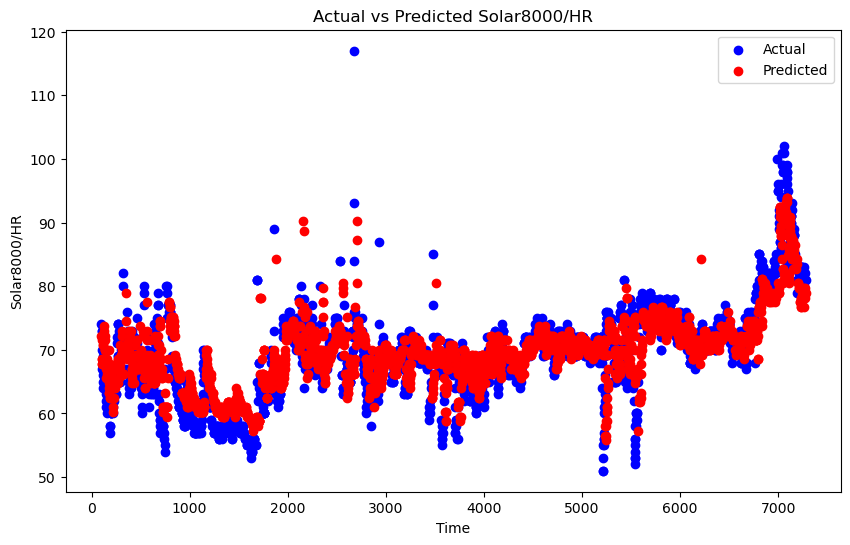

Root Mean Squared Error: 4.991530917513163


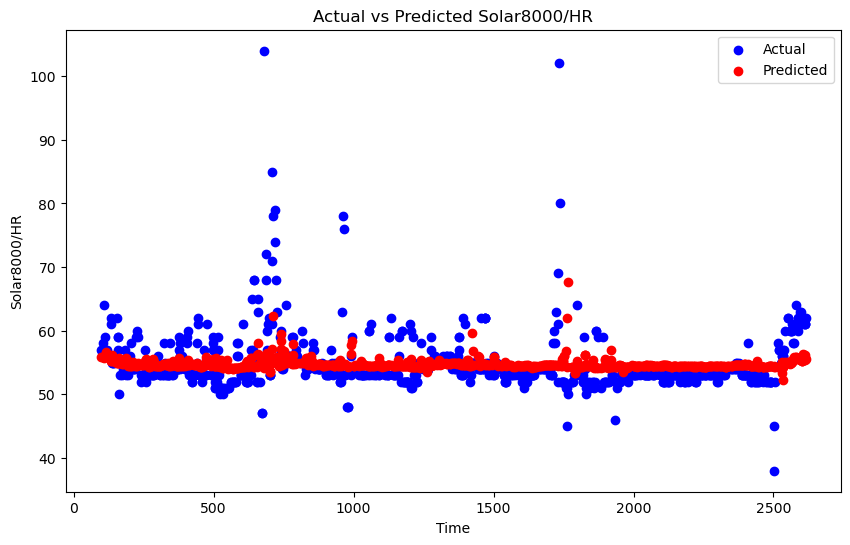

Root Mean Squared Error: 4.468255469825121


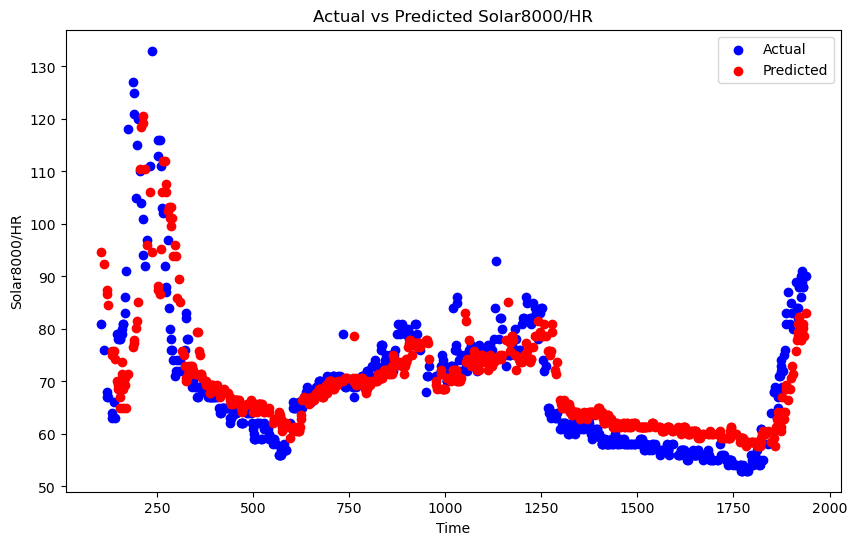

Root Mean Squared Error: 8.309204470498457


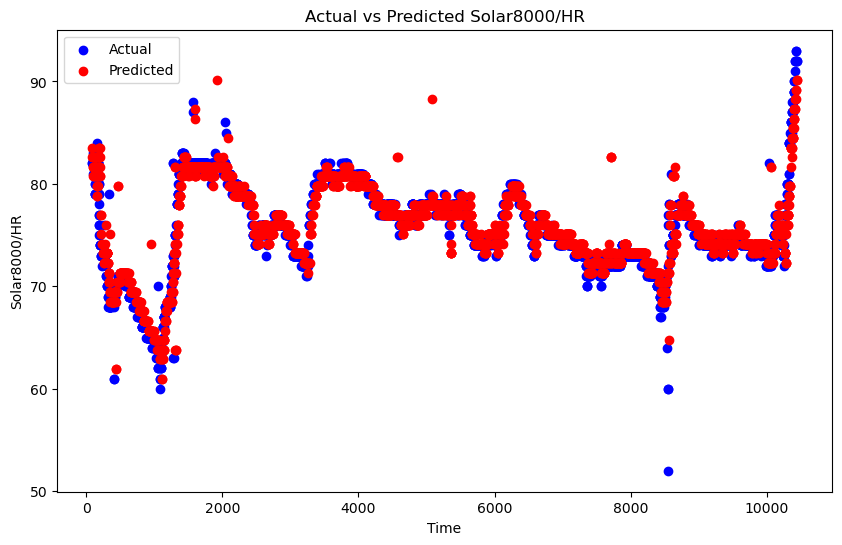

Root Mean Squared Error: 1.559480586927481


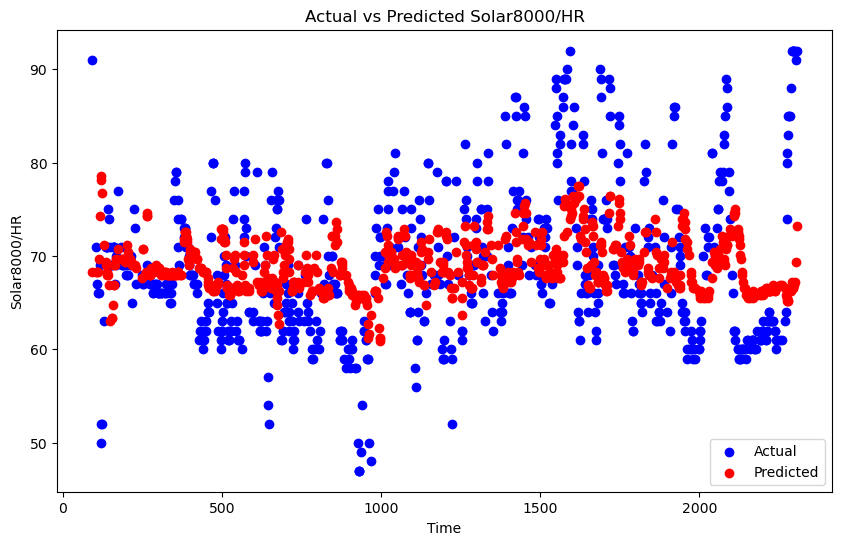

Root Mean Squared Error: 7.7093717668578


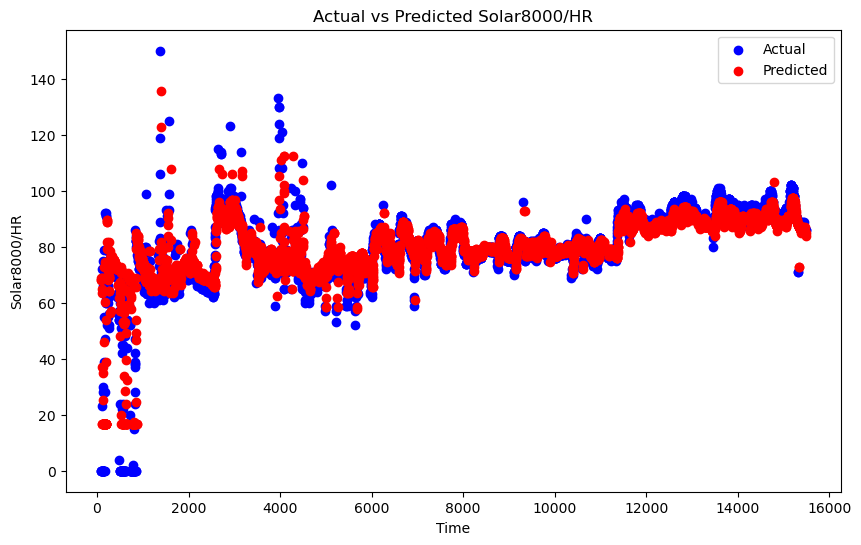

Root Mean Squared Error: 8.908764454706095


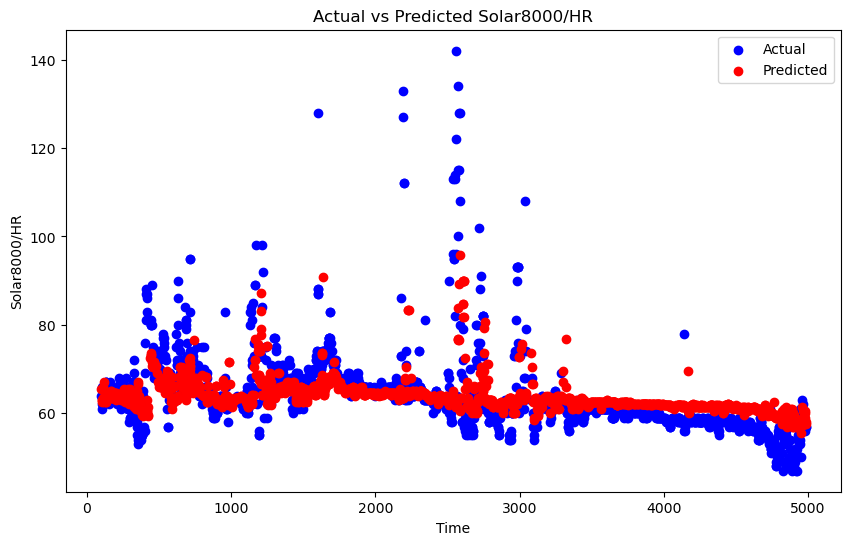

Root Mean Squared Error: 8.721929159174353


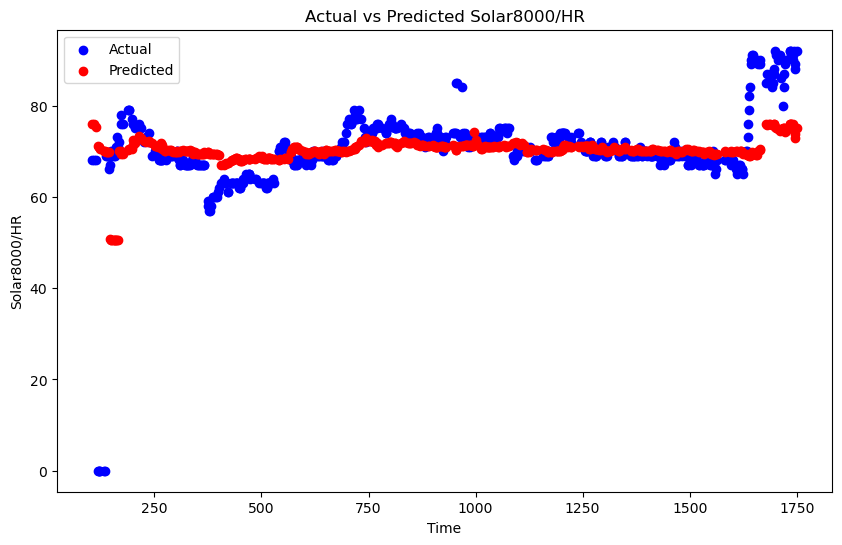

Root Mean Squared Error: 9.471999347176304


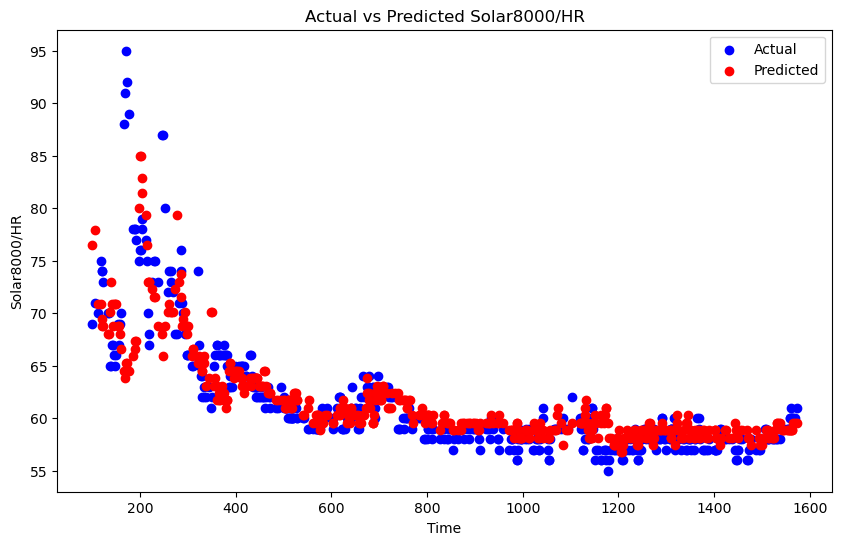

Root Mean Squared Error: 3.8369951101362614


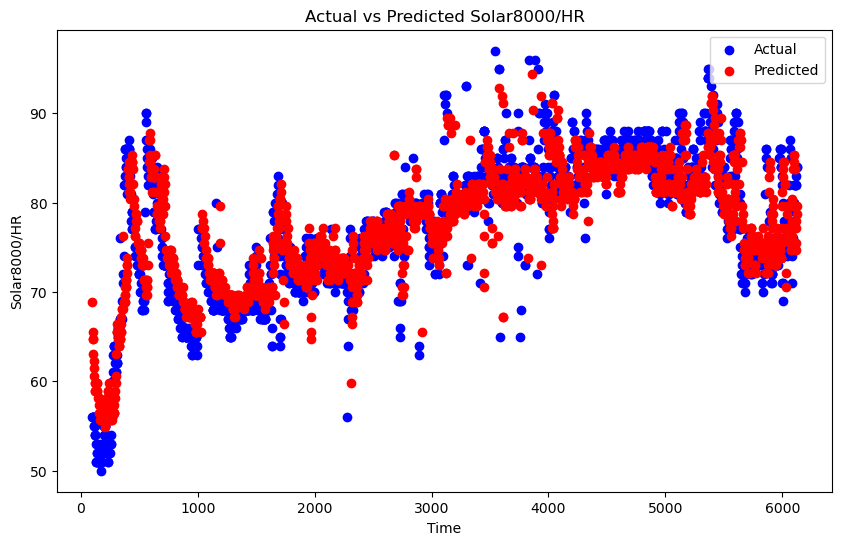

Root Mean Squared Error: 4.641710733538807


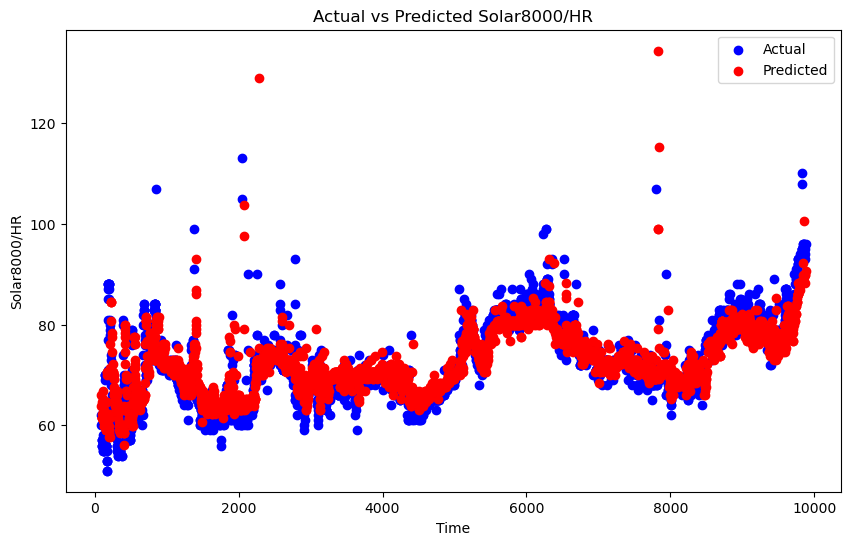

Root Mean Squared Error: 5.208816608108048


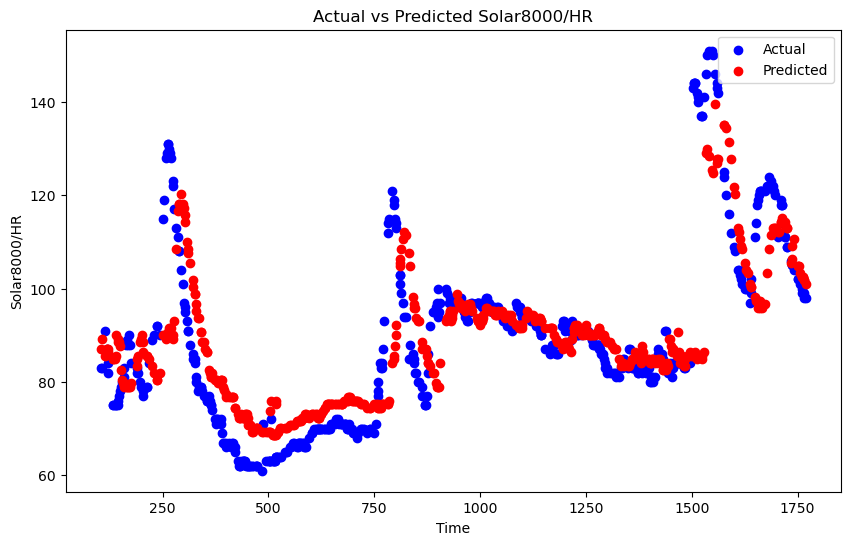

Root Mean Squared Error: 13.186918000573444


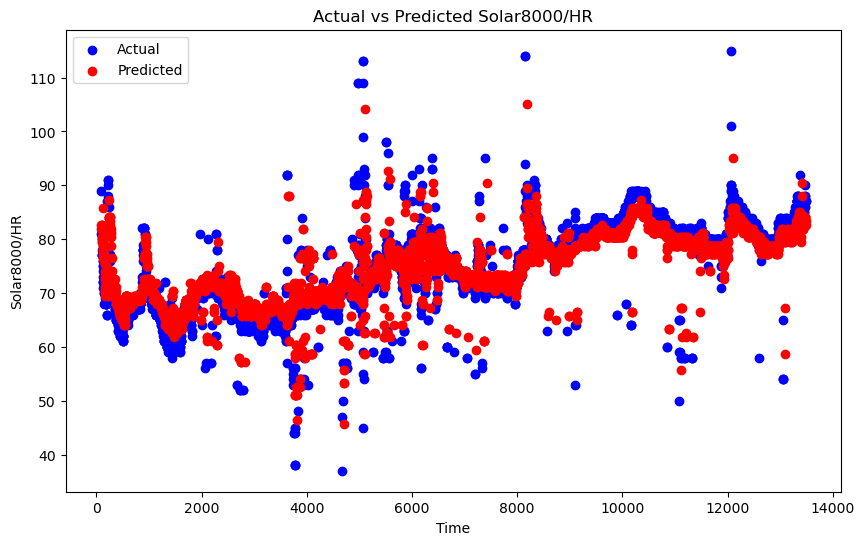

Root Mean Squared Error: 5.254175492323323


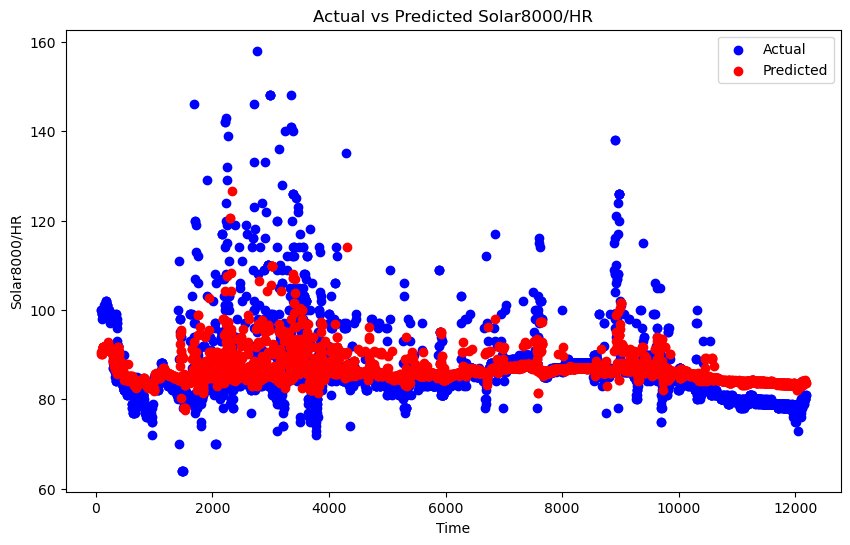

Root Mean Squared Error: 7.990527411104287


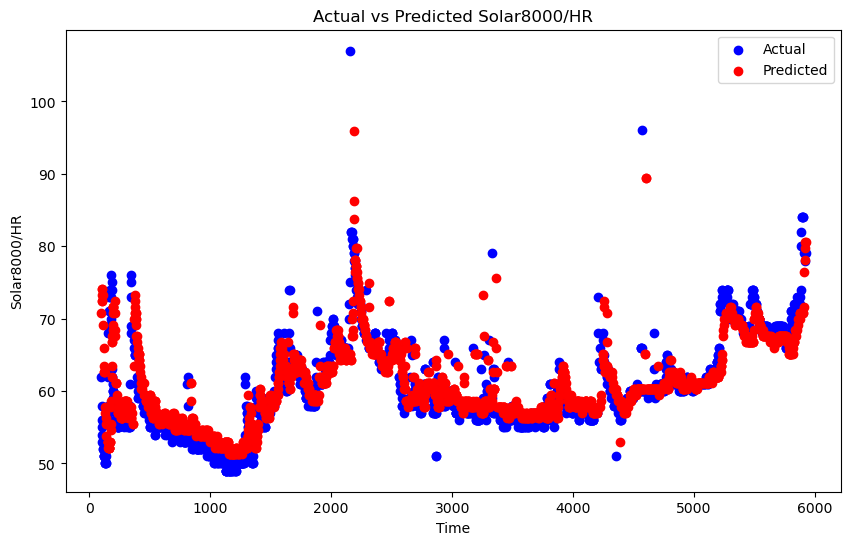

Root Mean Squared Error: 4.172658233746842


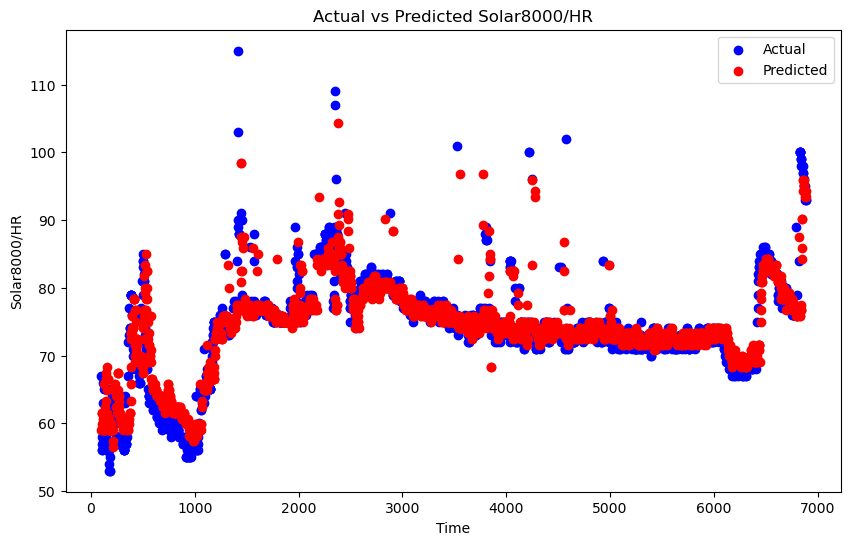

Root Mean Squared Error: 4.250514984732955


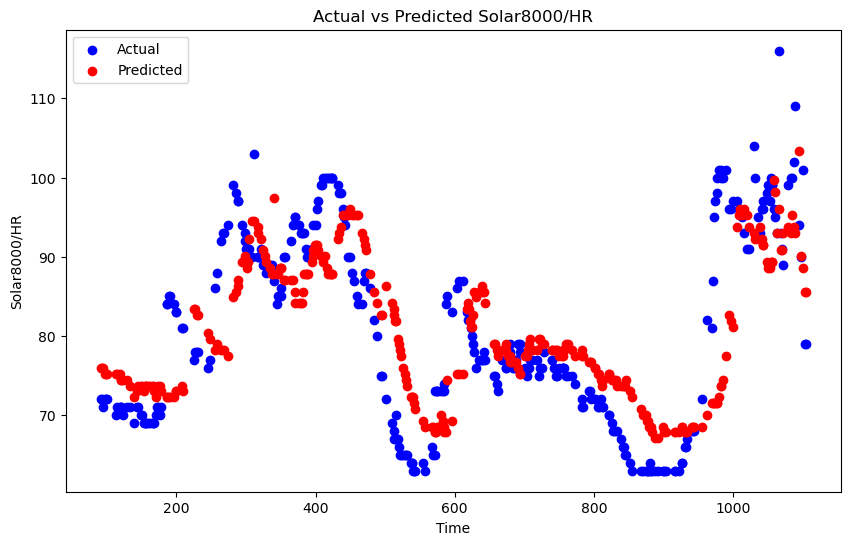

Root Mean Squared Error: 8.1081142825936


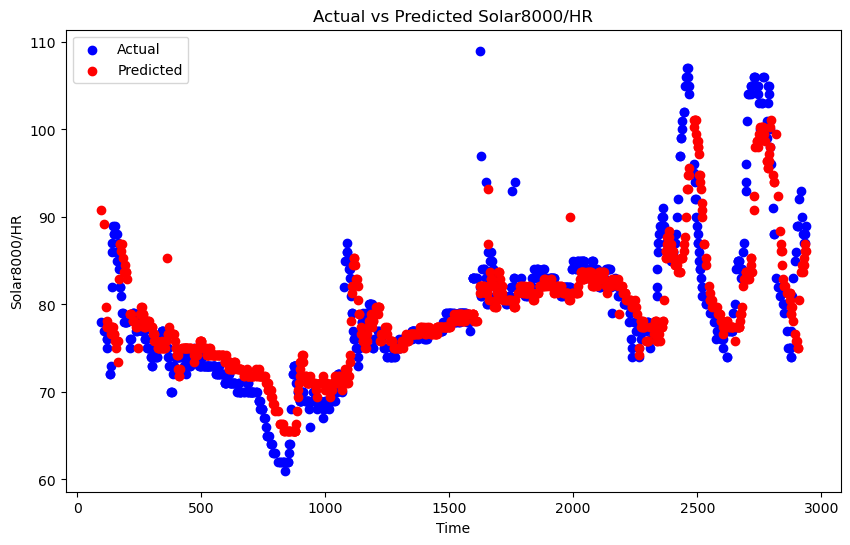

Root Mean Squared Error: 4.870342698761445


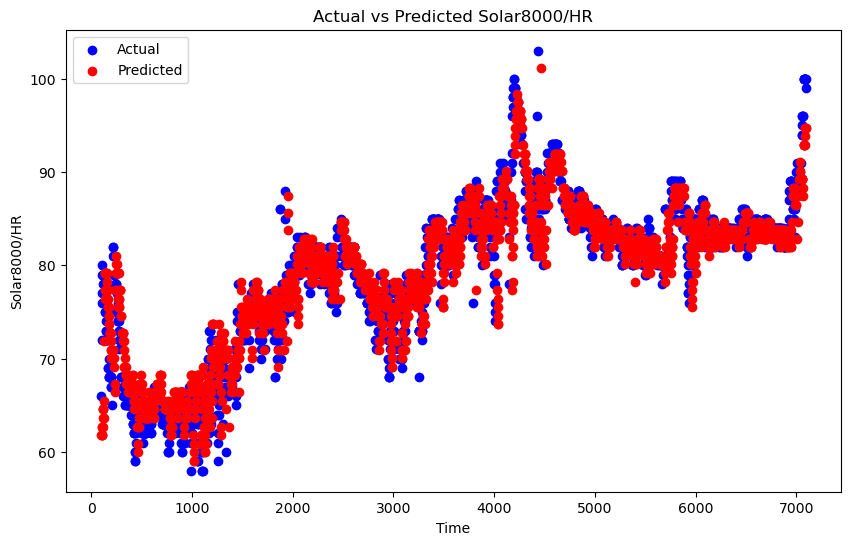

Root Mean Squared Error: 3.4029572452071815


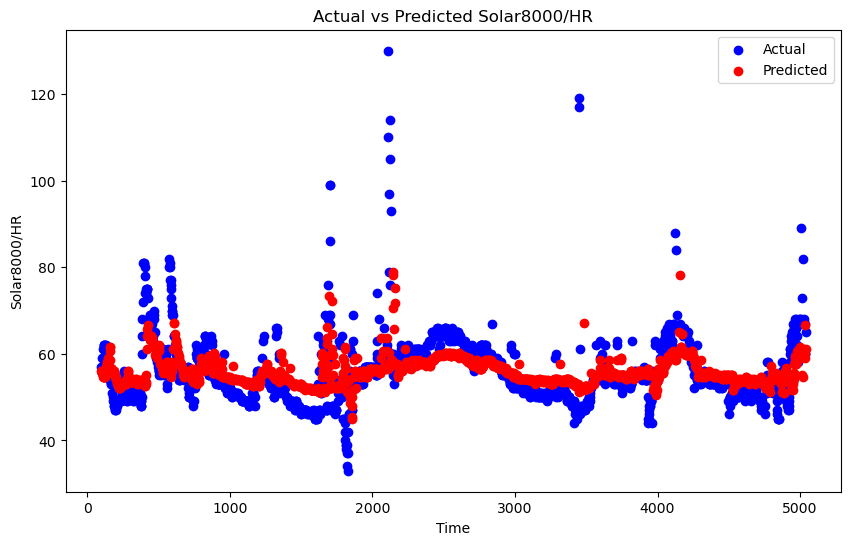

Root Mean Squared Error: 7.0971673131149124


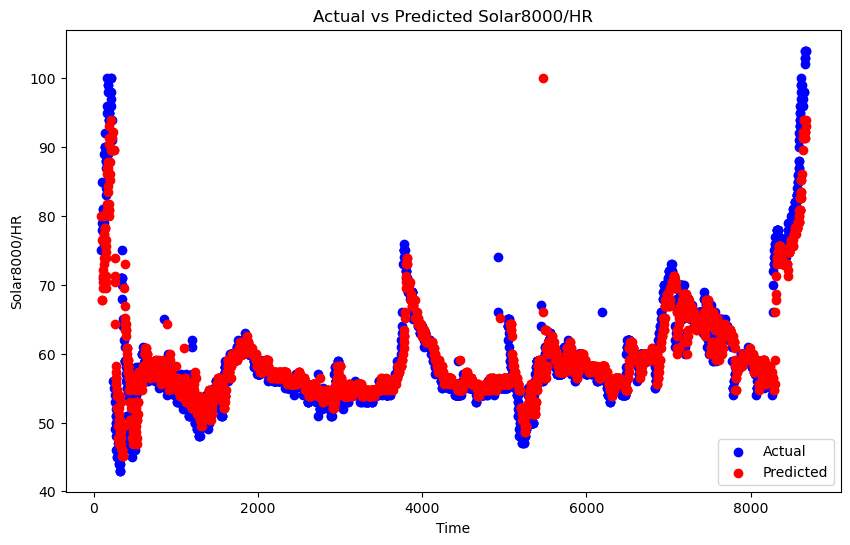

Root Mean Squared Error: 3.911506338157397


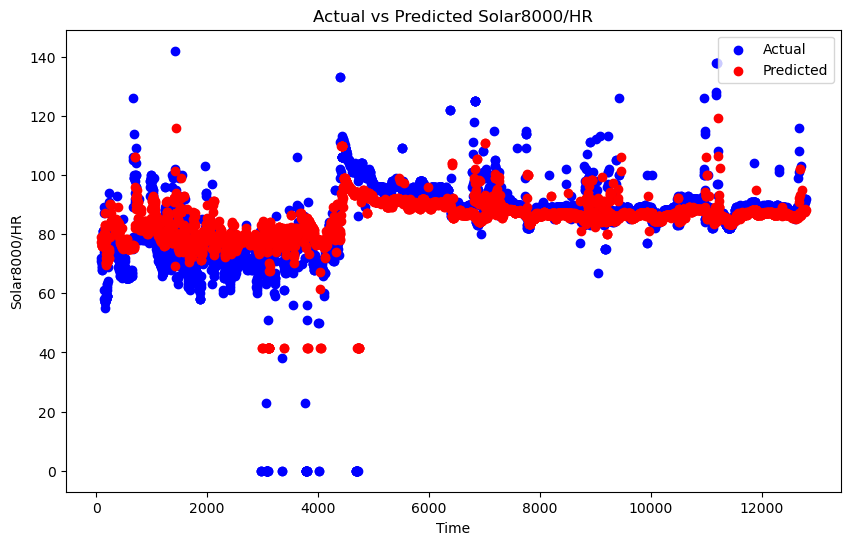

Root Mean Squared Error: 12.083182813879526


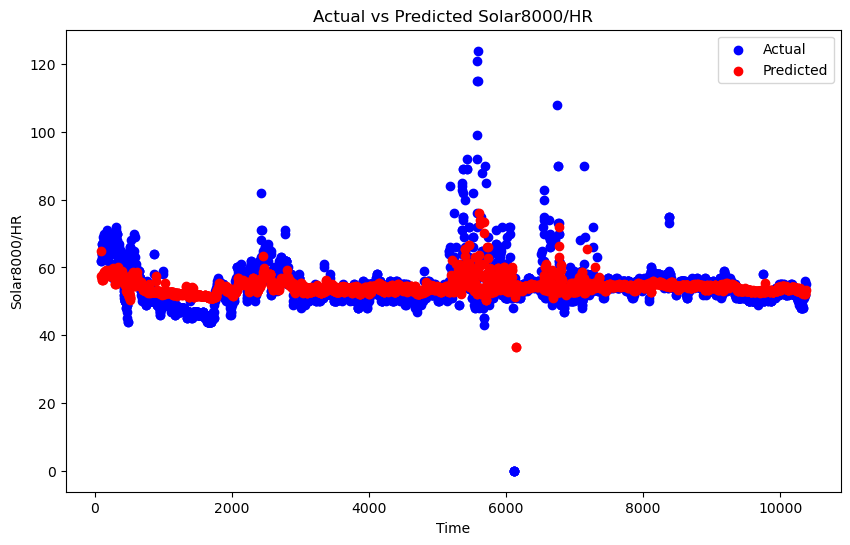

Root Mean Squared Error: 5.909249362979541


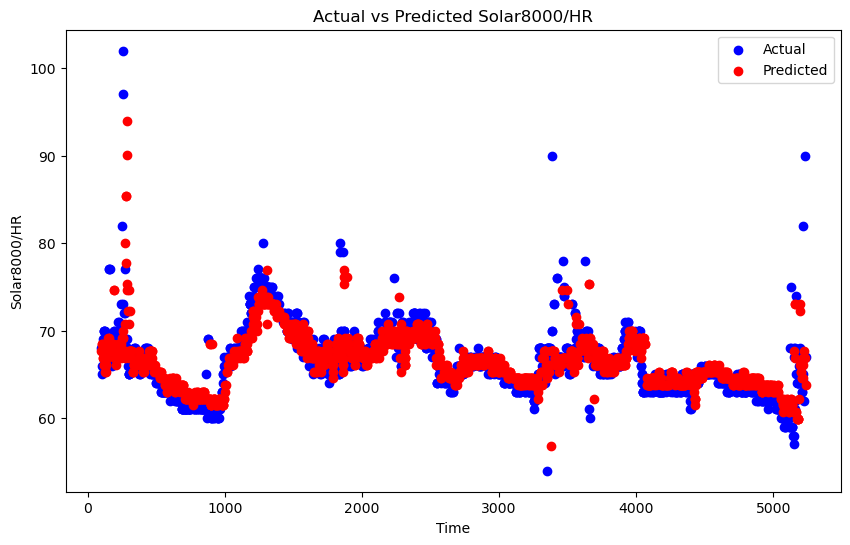

Root Mean Squared Error: 2.8126011226077035


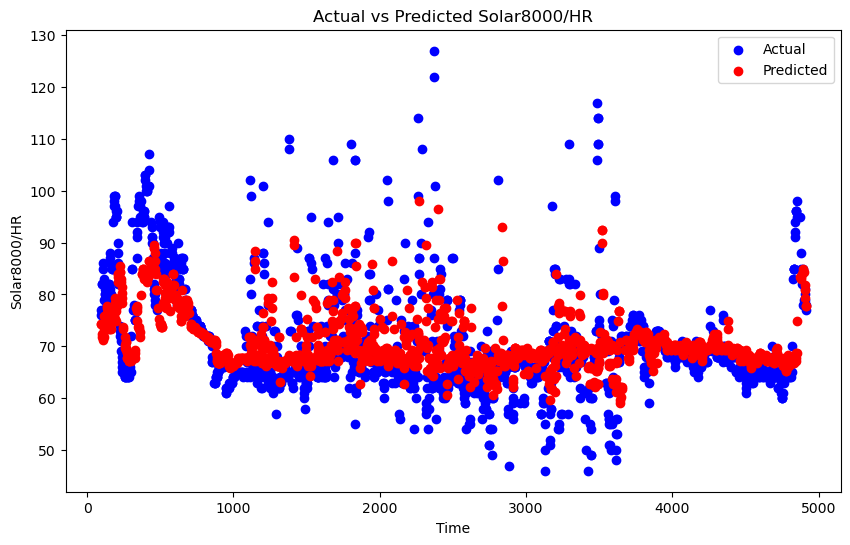

Root Mean Squared Error: 9.6253610293106


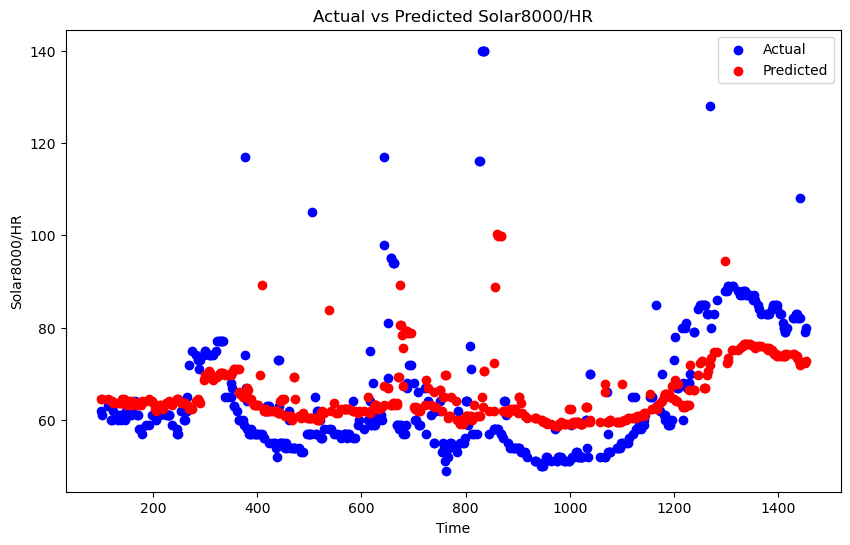

Root Mean Squared Error: 13.505898985690965


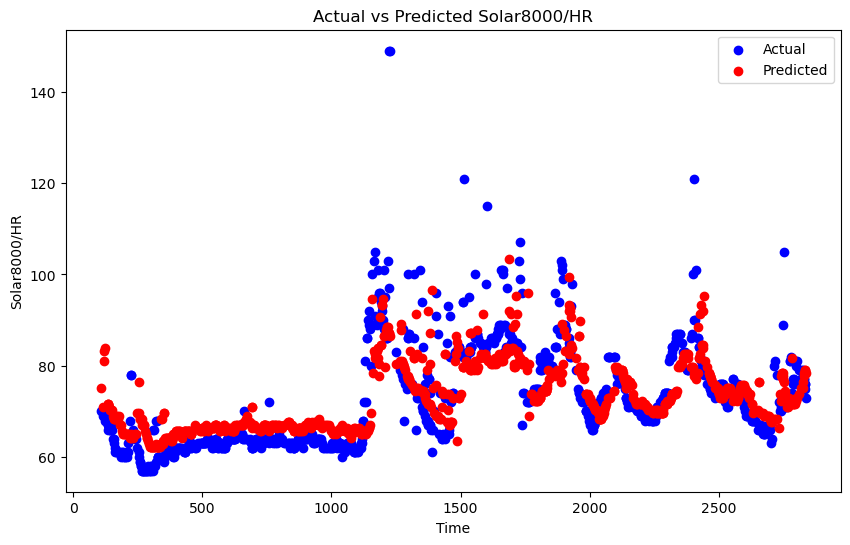

Root Mean Squared Error: 8.060968180394918


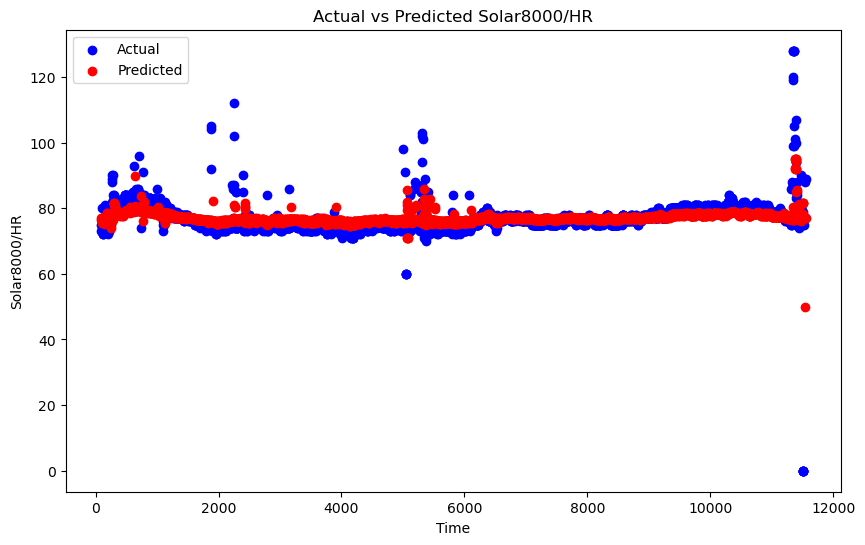

Root Mean Squared Error: 4.773845454018962


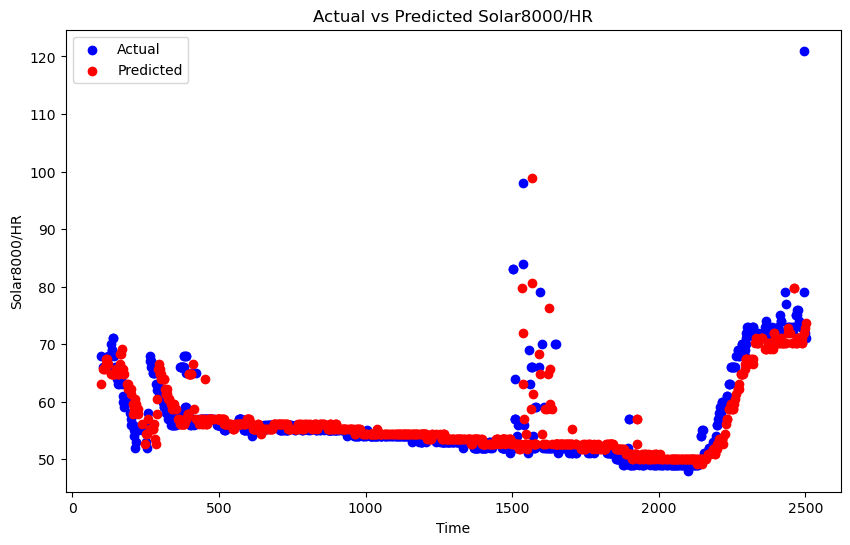

Root Mean Squared Error: 4.695765373485807


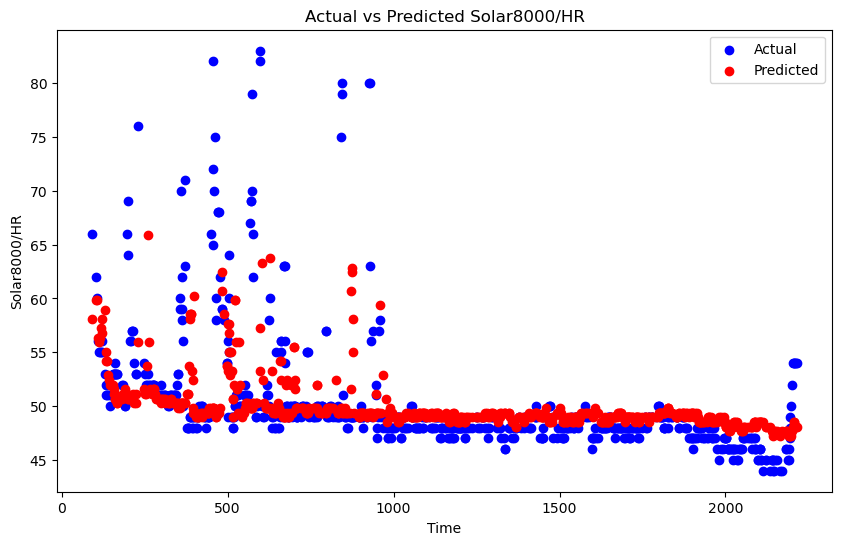

Root Mean Squared Error: 5.444904353603382


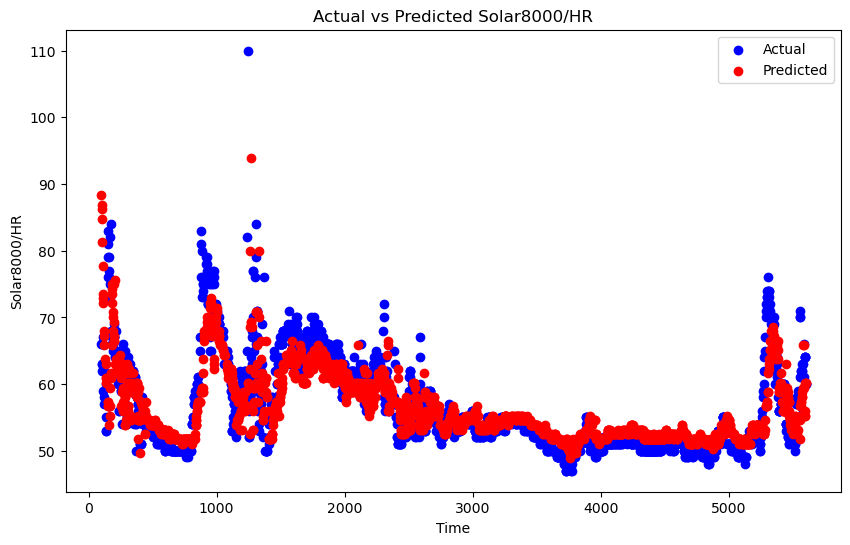

Root Mean Squared Error: 4.848676015570815


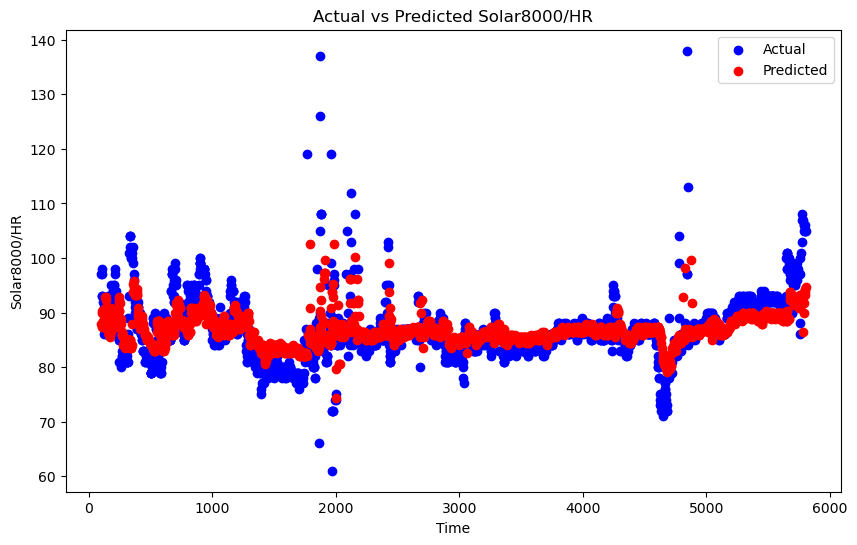

Root Mean Squared Error: 4.926508868247809


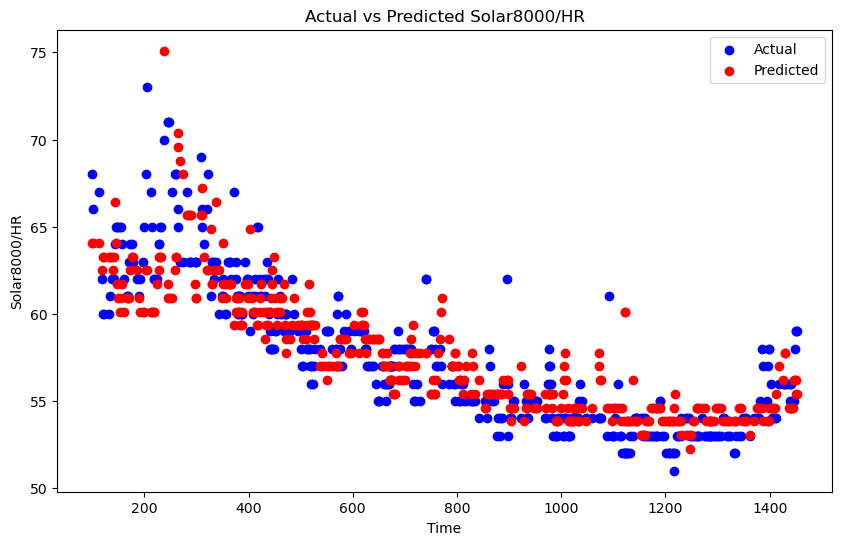

Root Mean Squared Error: 2.374077052541963


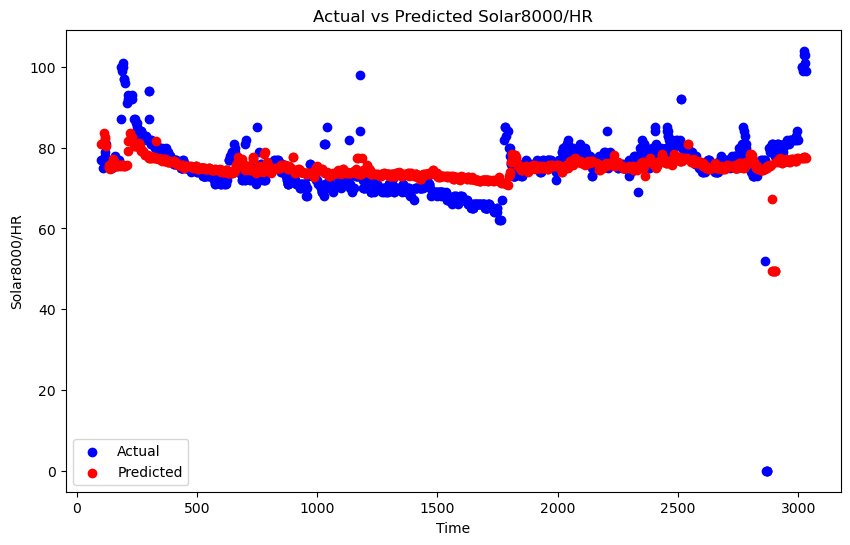

Root Mean Squared Error: 7.344291233868394


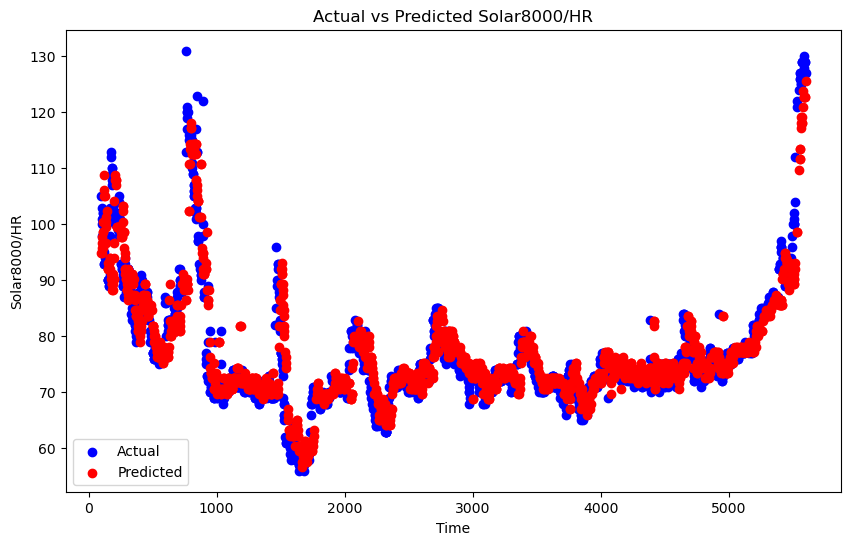

Root Mean Squared Error: 5.15358892996086


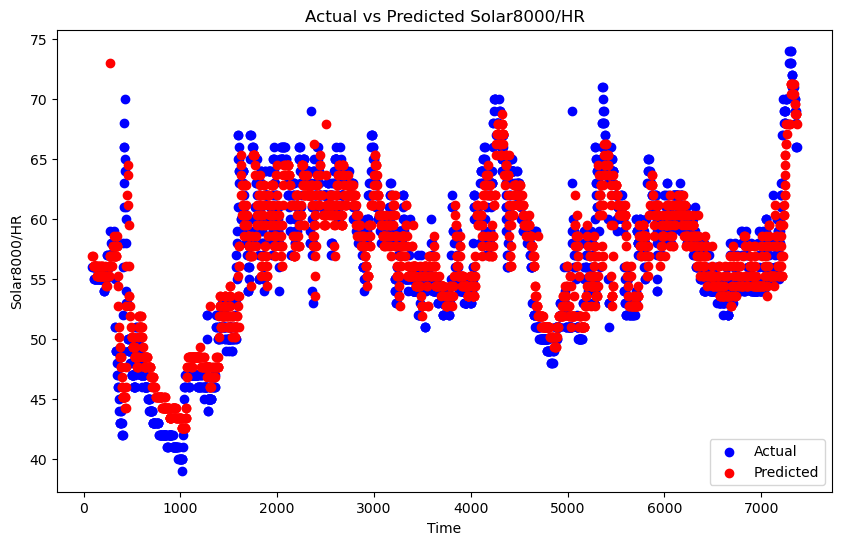

Root Mean Squared Error: 3.6484771359313273


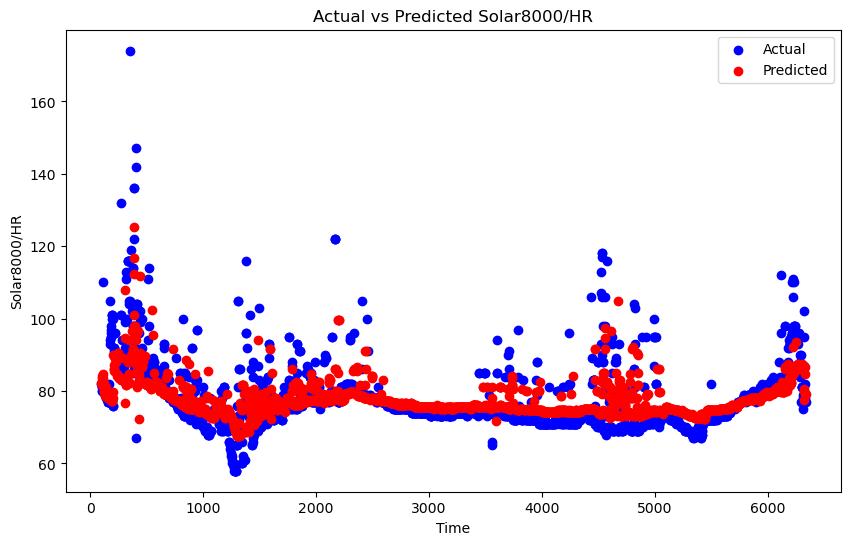

Root Mean Squared Error: 8.219838378925447


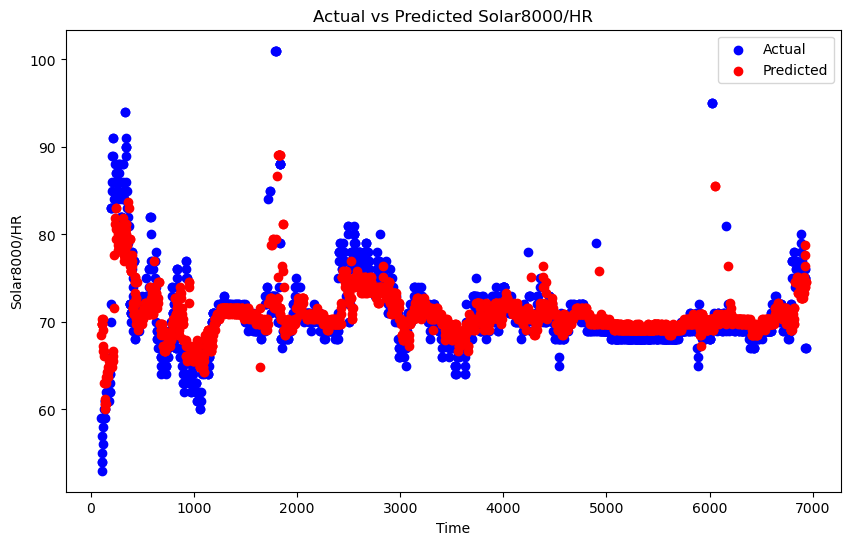

Root Mean Squared Error: 3.620255276383905


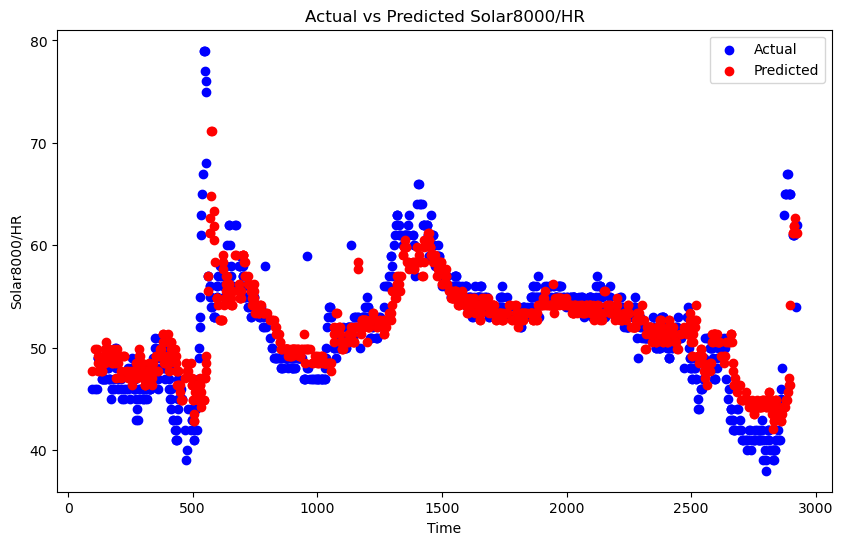

Root Mean Squared Error: 4.407462002852939


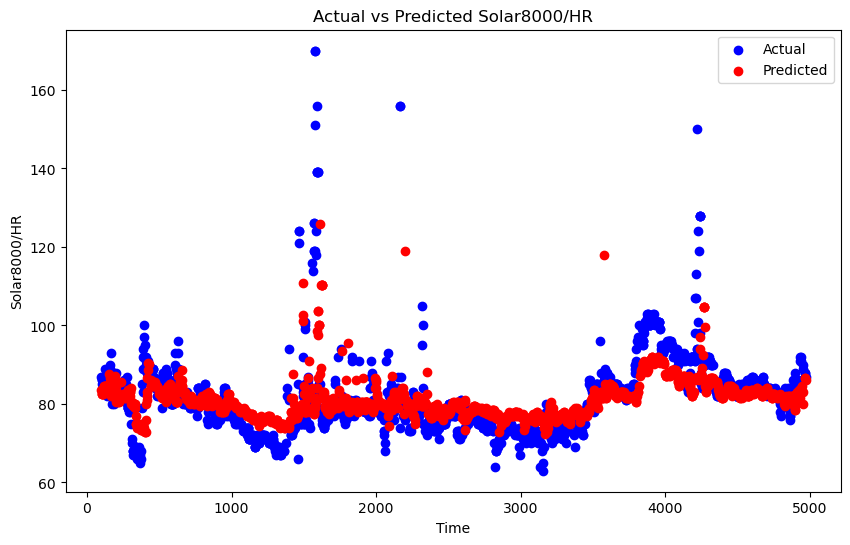

Root Mean Squared Error: 9.356788056340852


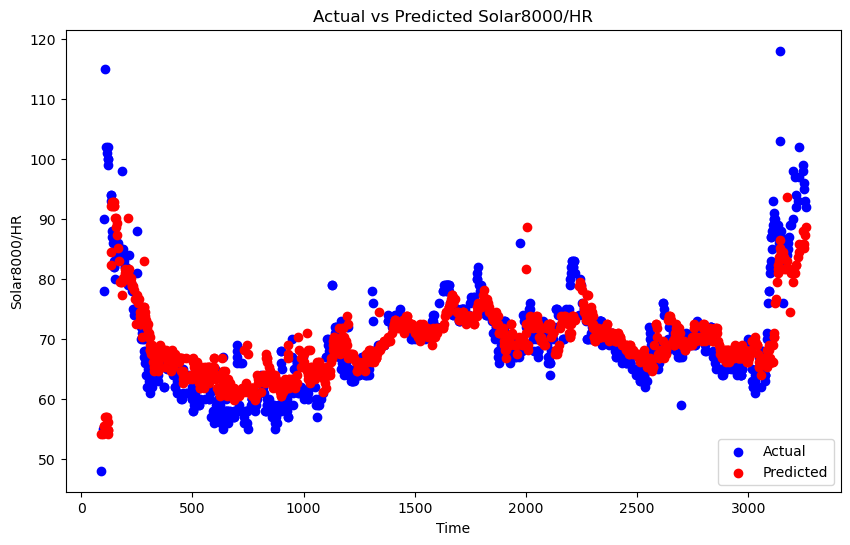

Root Mean Squared Error: 6.329812175982363


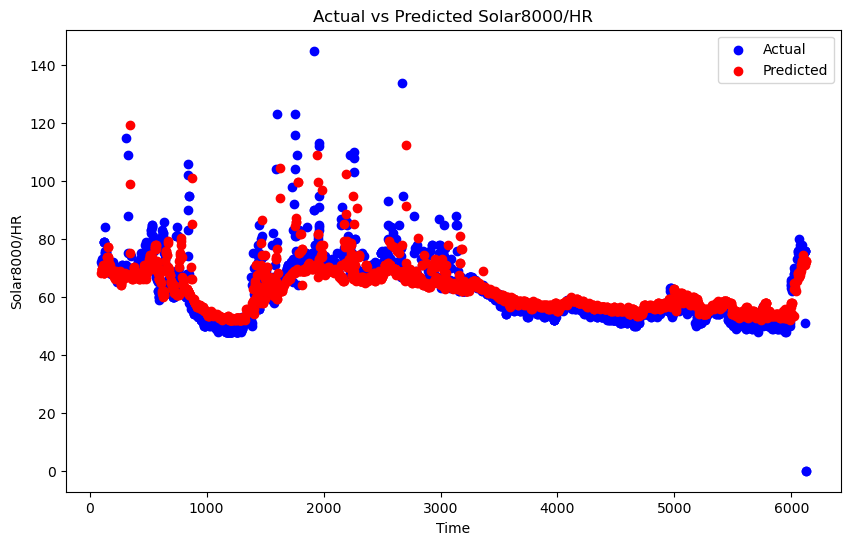

Root Mean Squared Error: 7.909028338637157


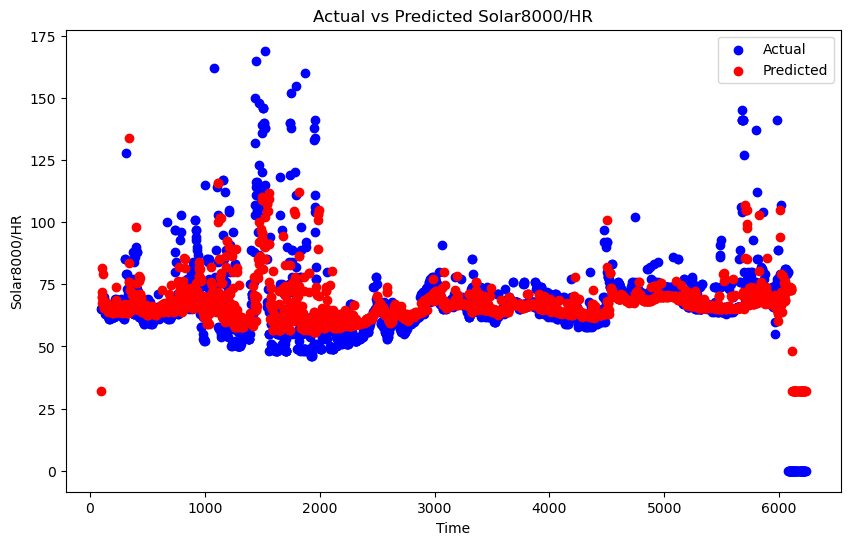

Root Mean Squared Error: 16.42792076676946


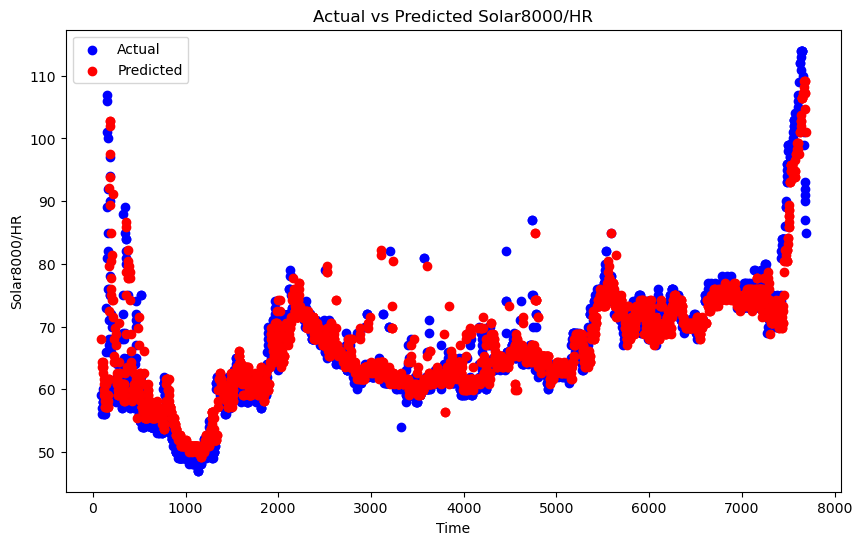

Root Mean Squared Error: 4.855089974814563


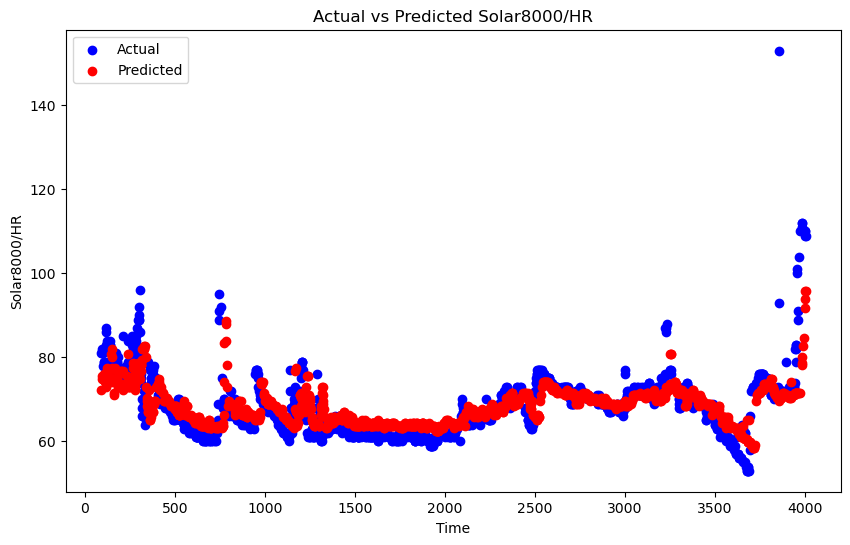

Root Mean Squared Error: 5.9565271315090484


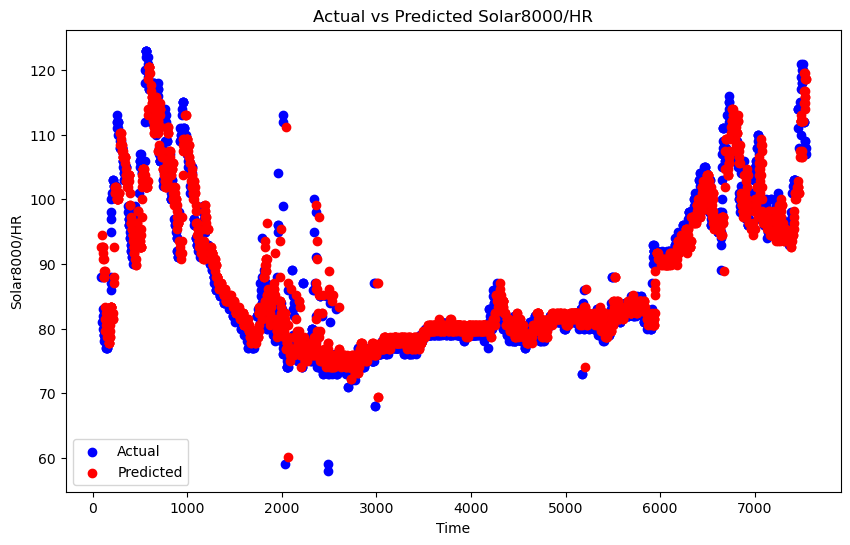

Root Mean Squared Error: 4.559828037507578


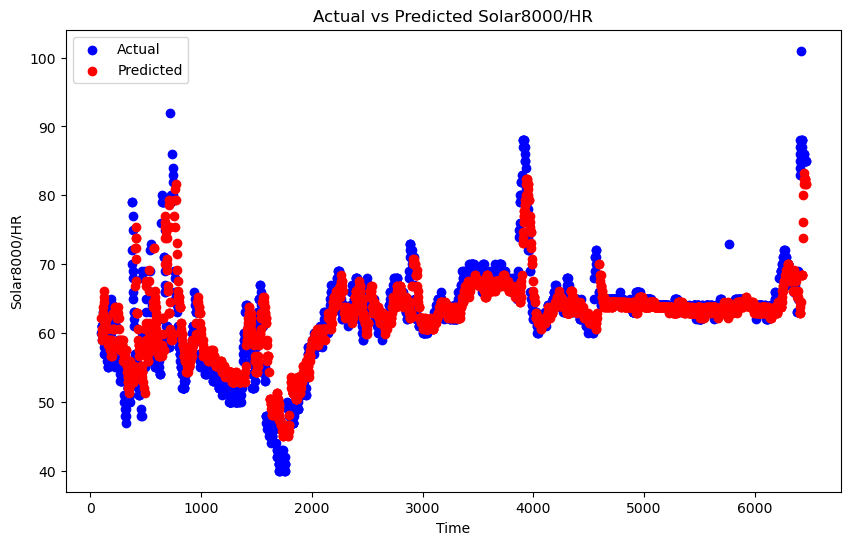

Root Mean Squared Error: 4.758380704504103


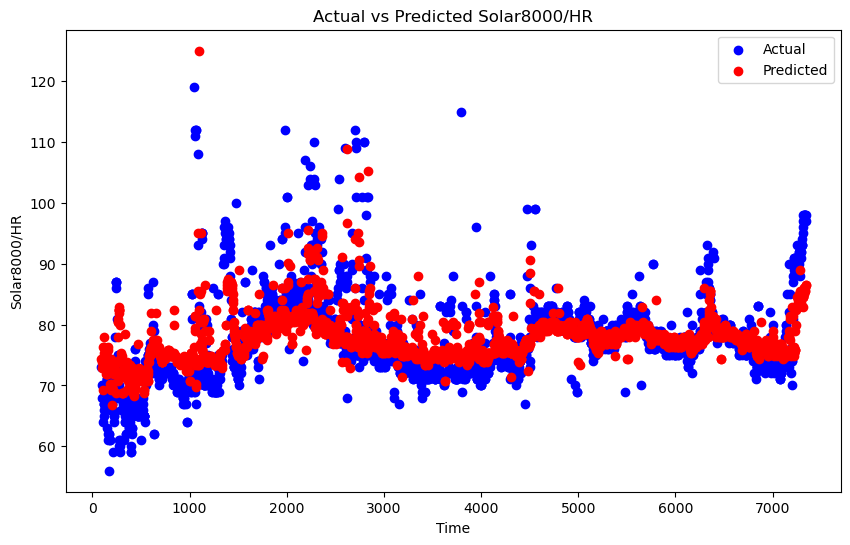

Root Mean Squared Error: 6.107146875396969


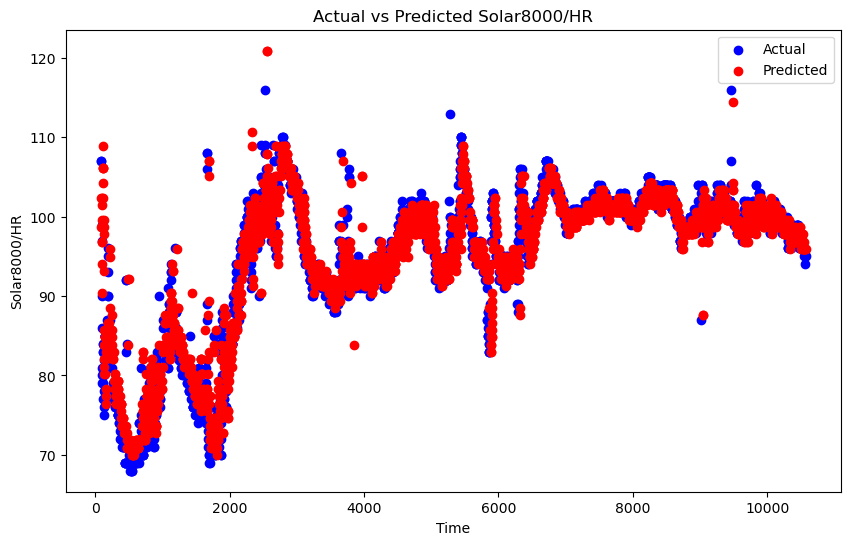

Root Mean Squared Error: 3.6925498771186183


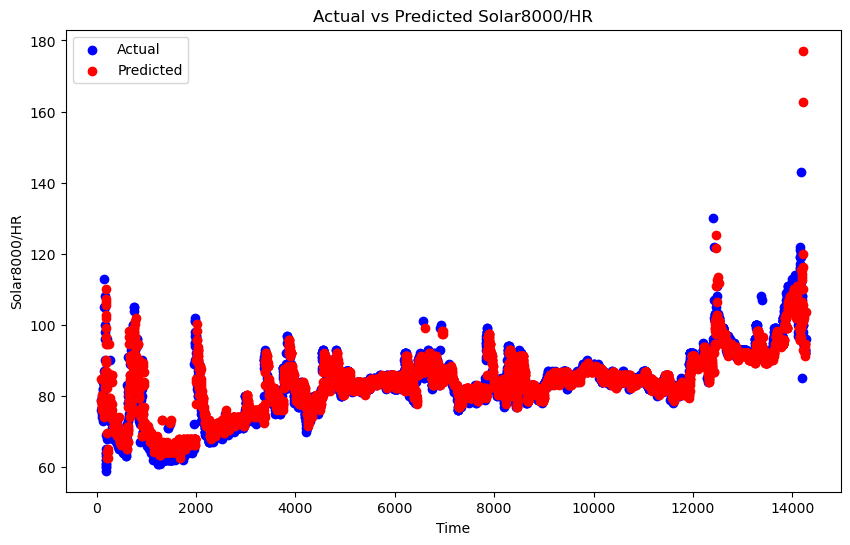

Root Mean Squared Error: 4.713959822081578


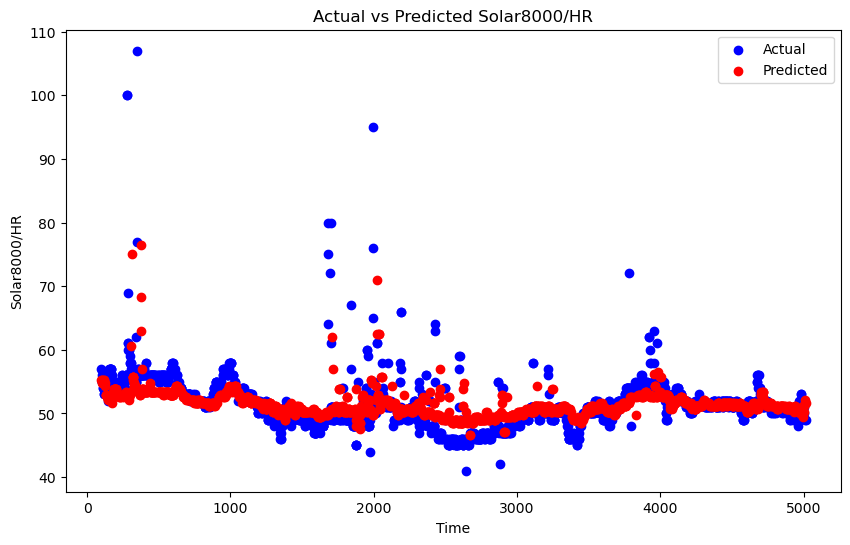

Root Mean Squared Error: 3.9937013982482994


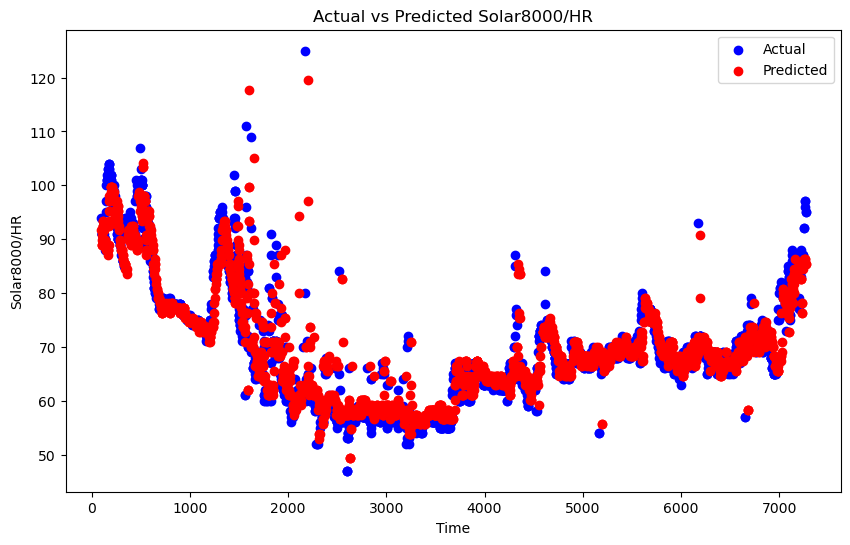

Root Mean Squared Error: 5.509506942240029


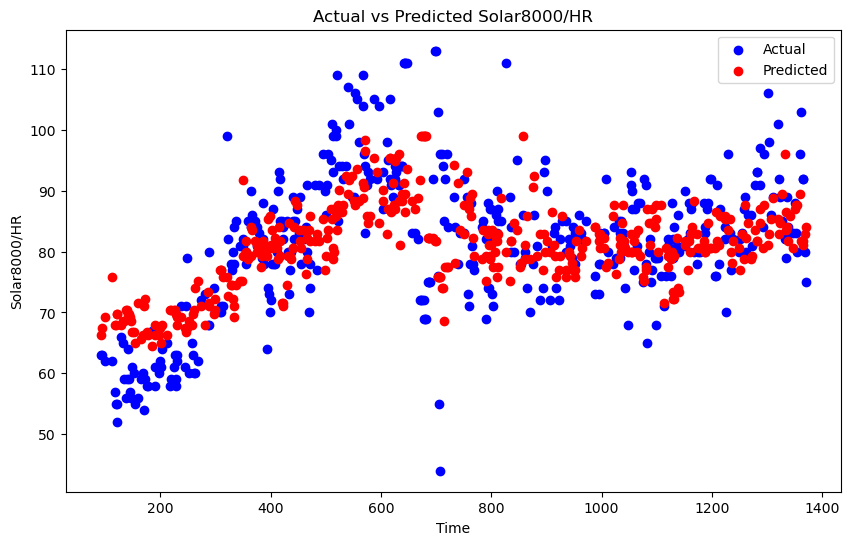

Root Mean Squared Error: 9.880385272530118


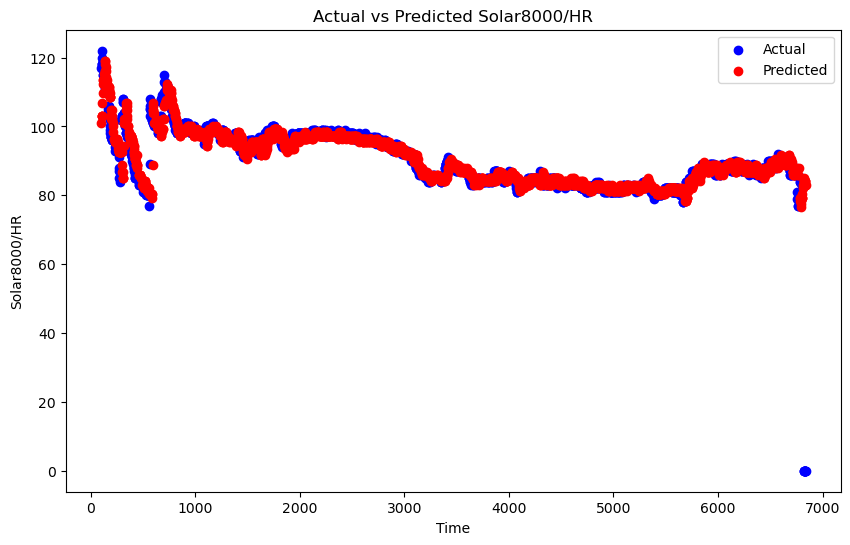

Root Mean Squared Error: 6.583602574250223


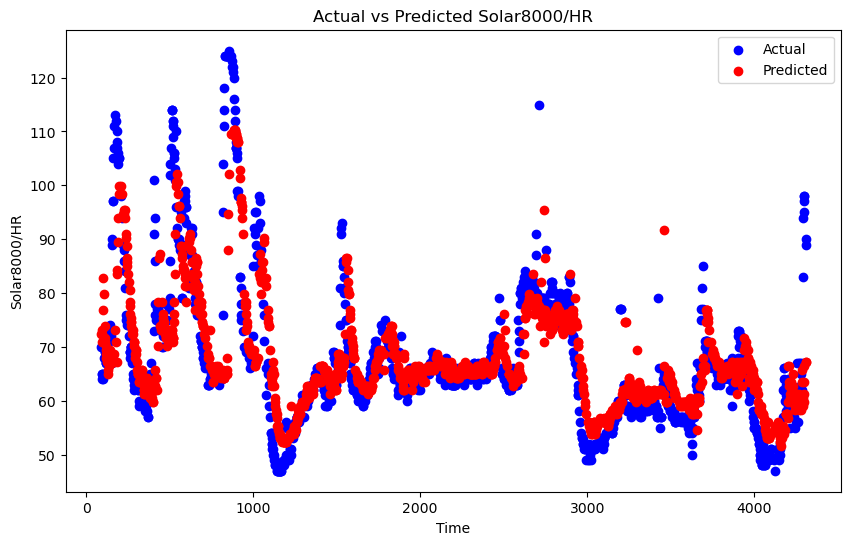

Root Mean Squared Error: 9.83542680850808


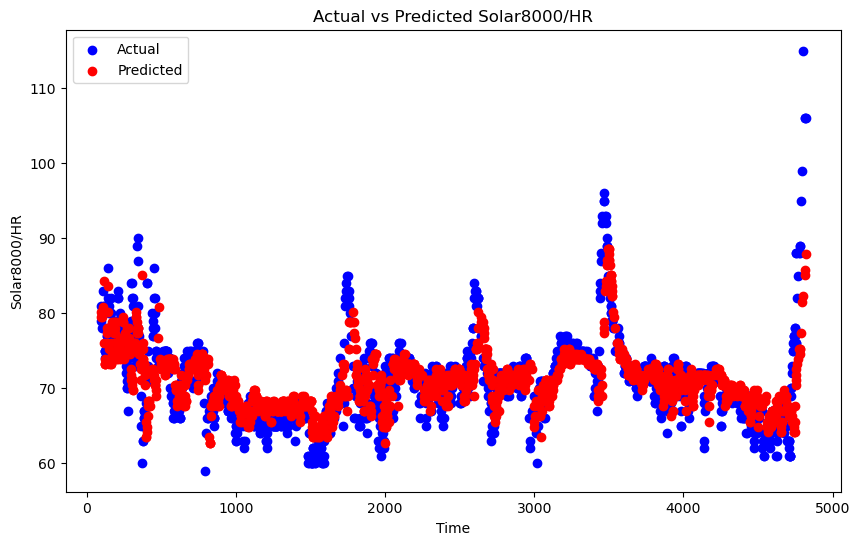

Root Mean Squared Error: 4.311497474464055


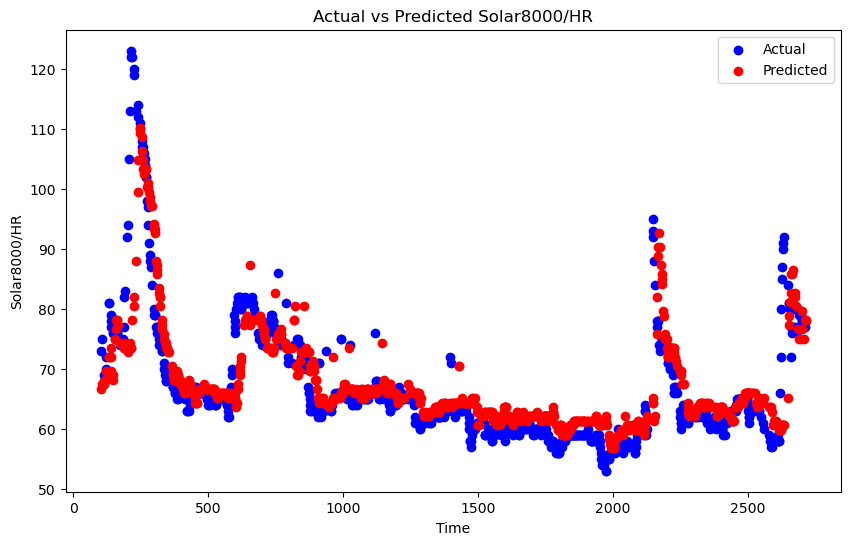

Root Mean Squared Error: 6.496582457480678


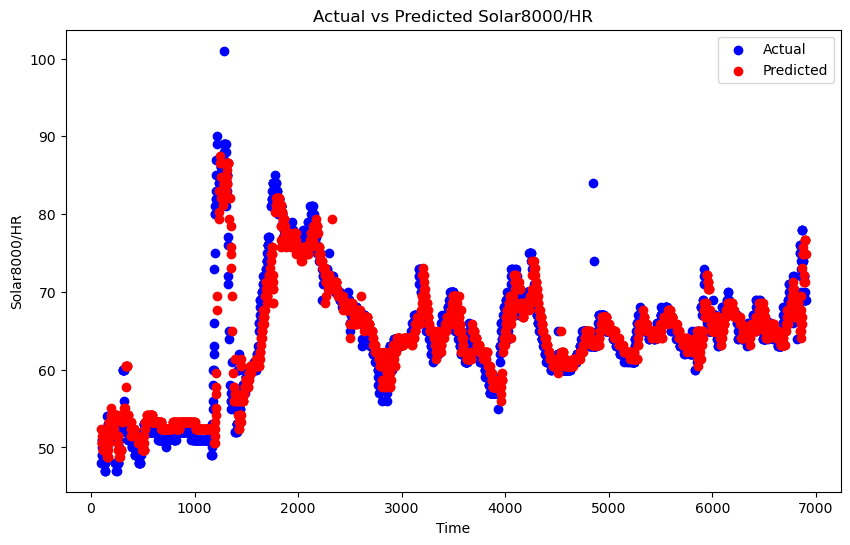

Root Mean Squared Error: 3.390575998891221


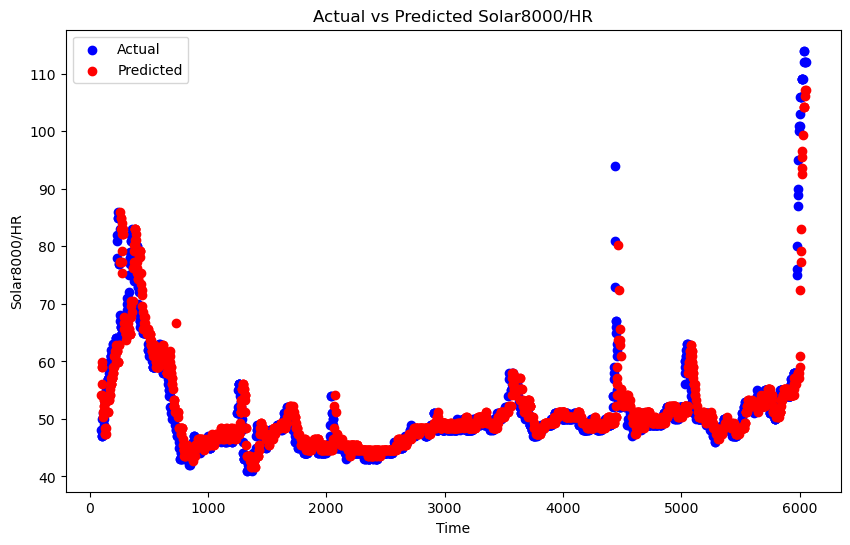

Root Mean Squared Error: 4.736603449927488


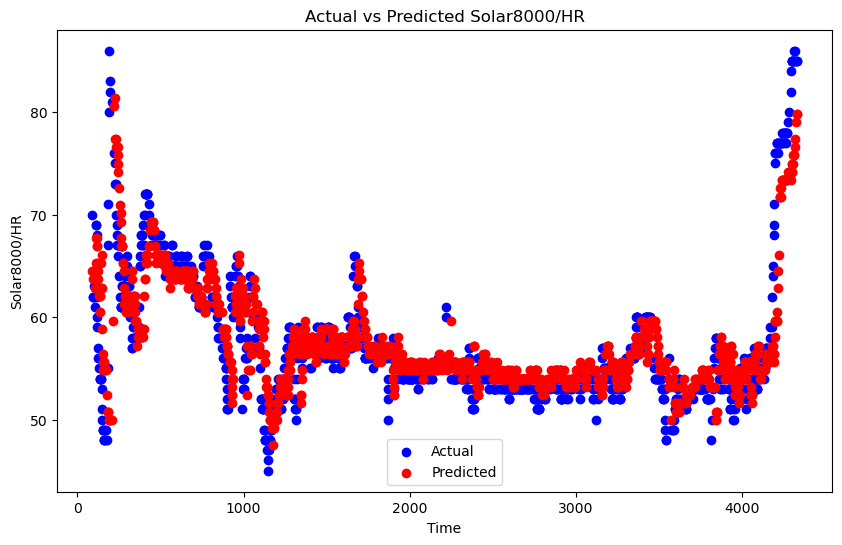

Root Mean Squared Error: 4.158533235563868


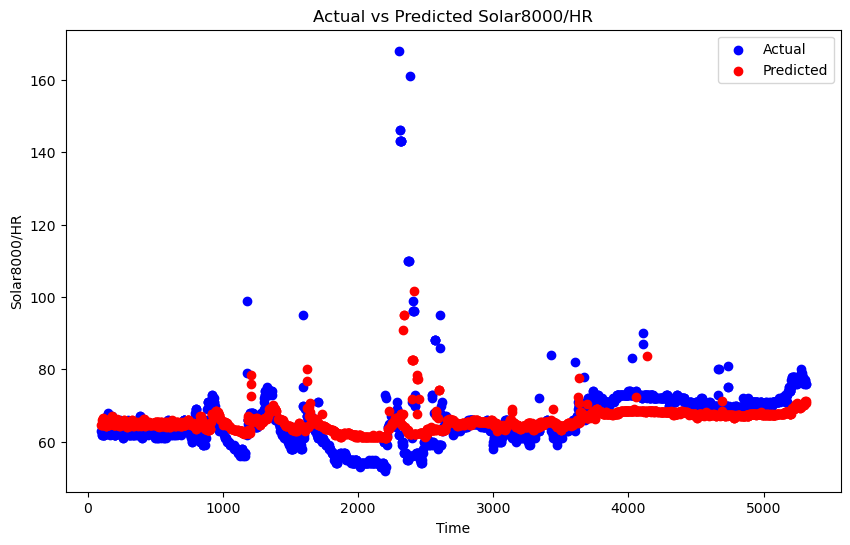

Root Mean Squared Error: 8.445573088282714


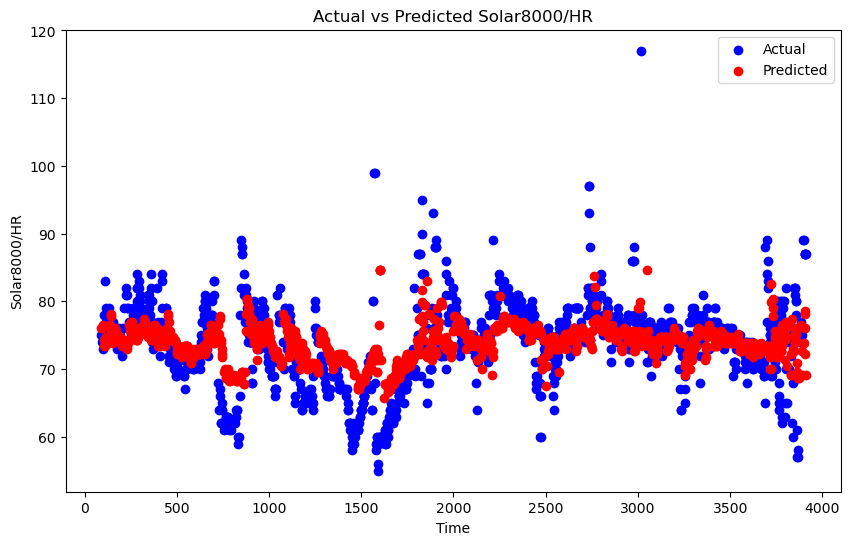

Root Mean Squared Error: 5.650461637126589


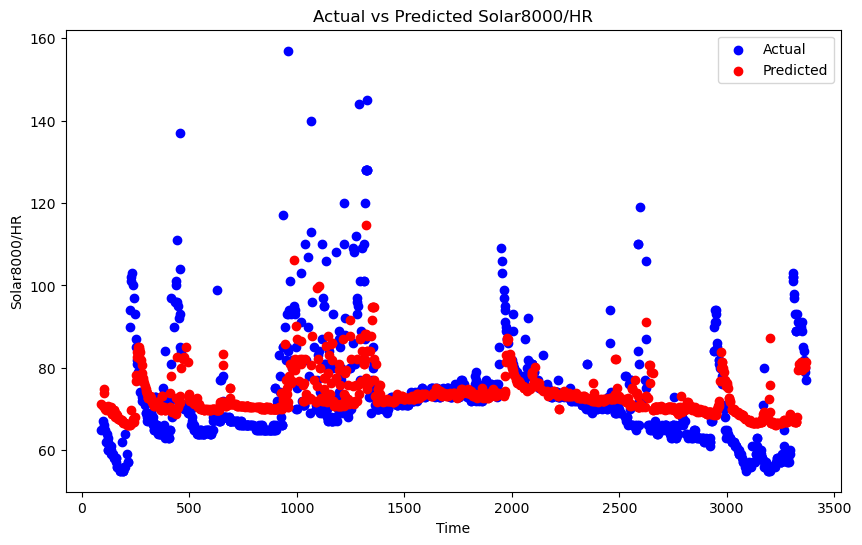

Root Mean Squared Error: 11.637900542561821


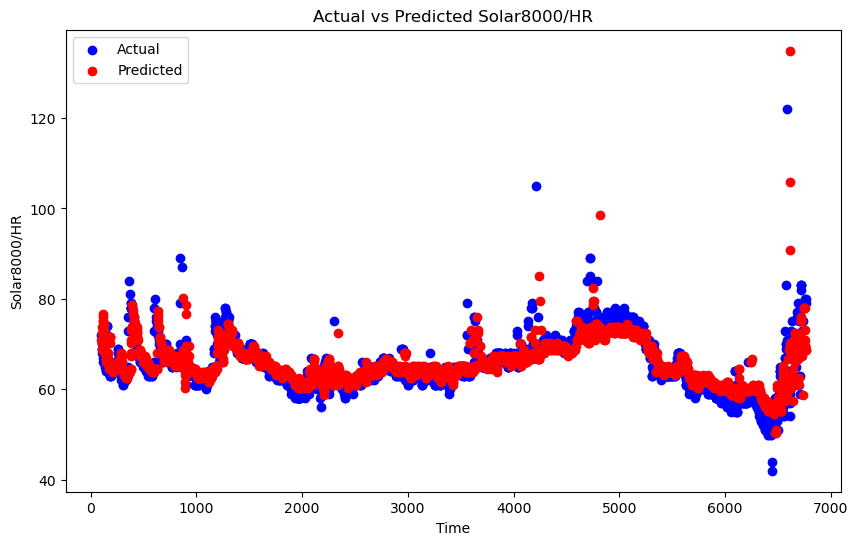

Root Mean Squared Error: 4.343895907058595


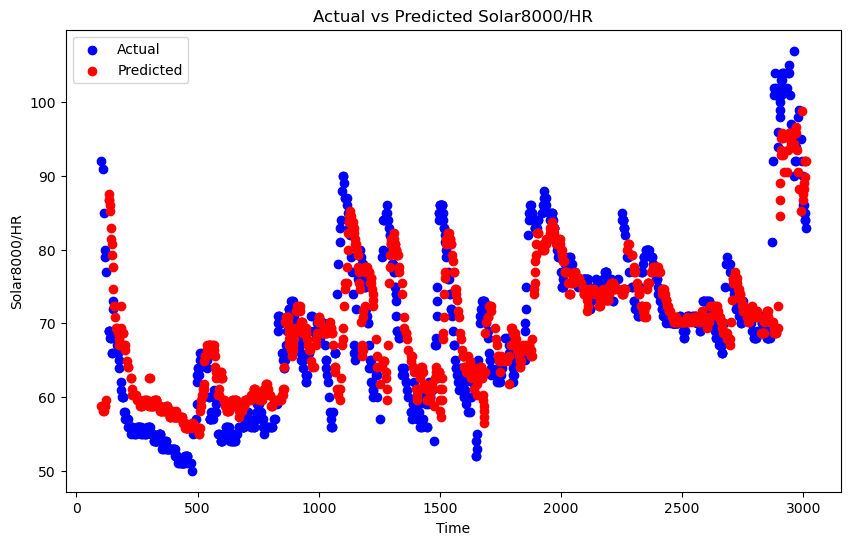

Root Mean Squared Error: 7.749466681766042


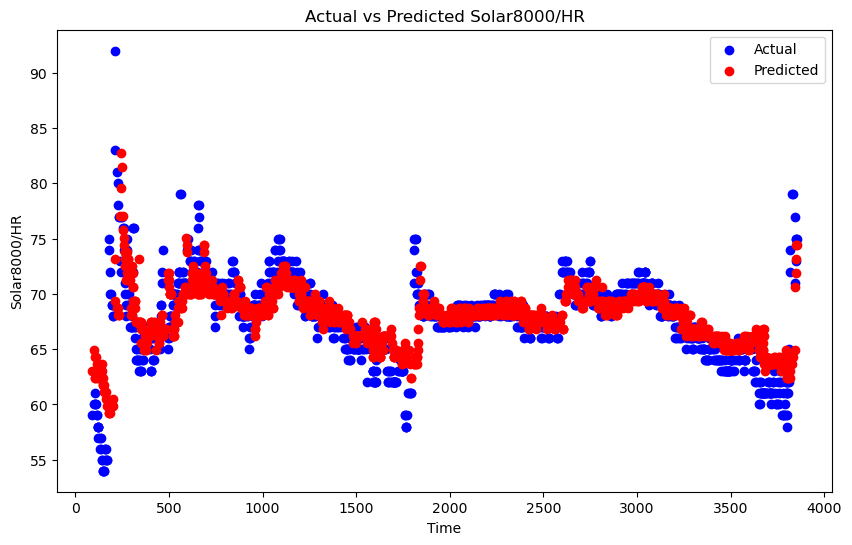

Root Mean Squared Error: 2.8606414463401086


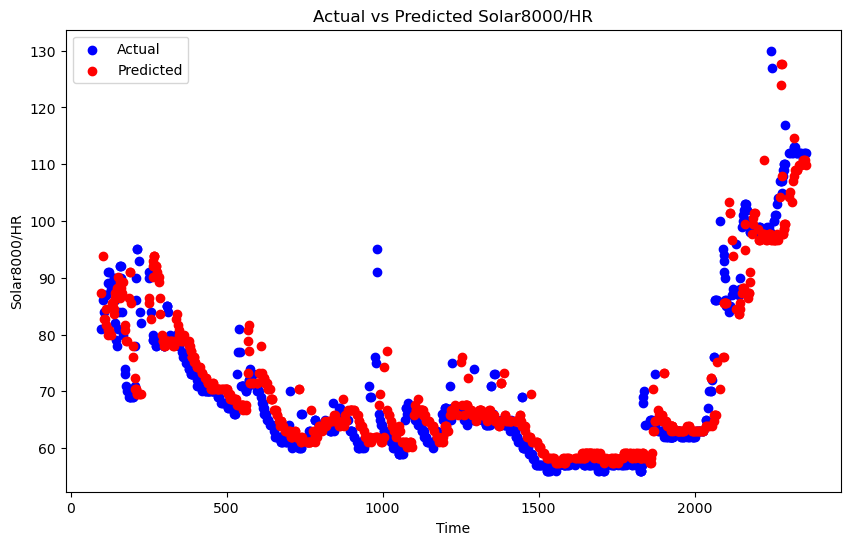

Root Mean Squared Error: 6.1853491981969535


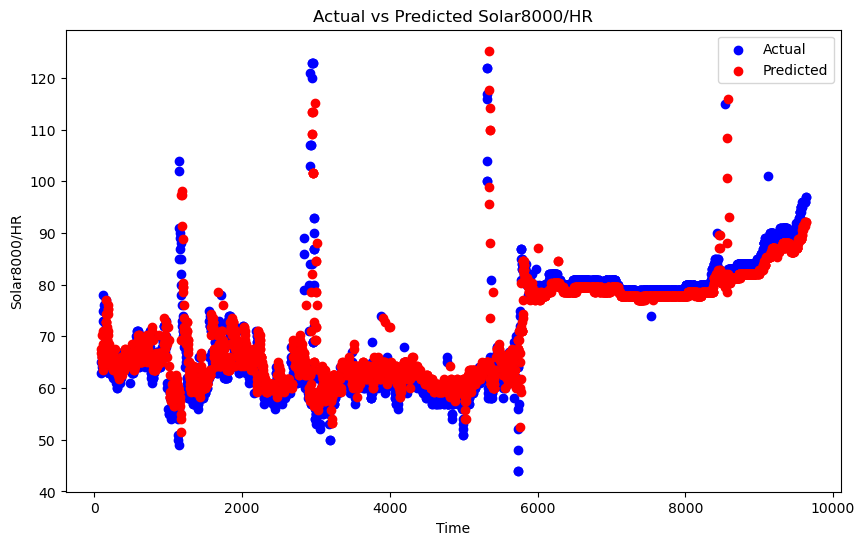

Root Mean Squared Error: 6.2074111974420285


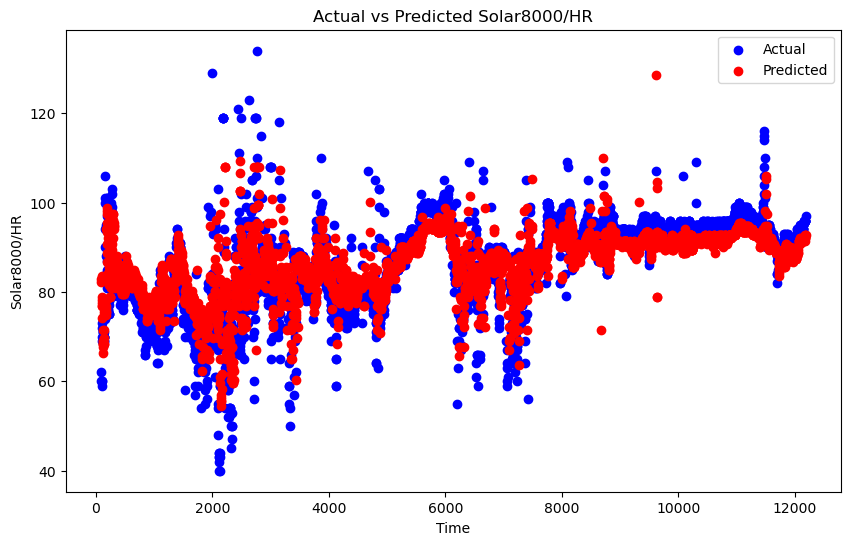

Root Mean Squared Error: 7.454373532553159


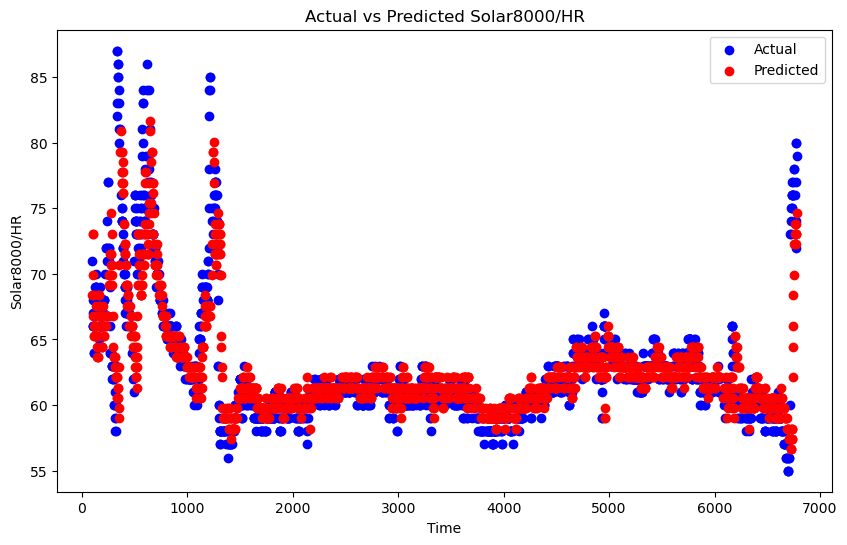

Root Mean Squared Error: 3.263455242836741


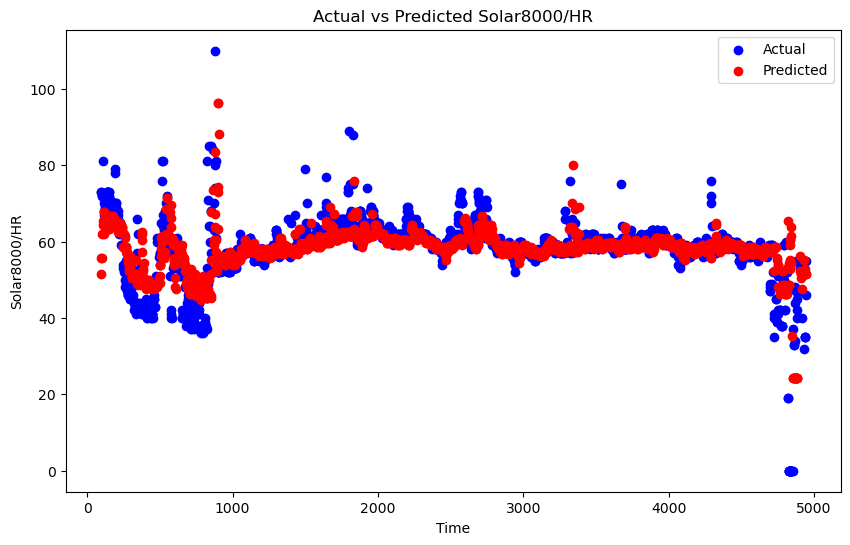

Root Mean Squared Error: 8.106471341599557


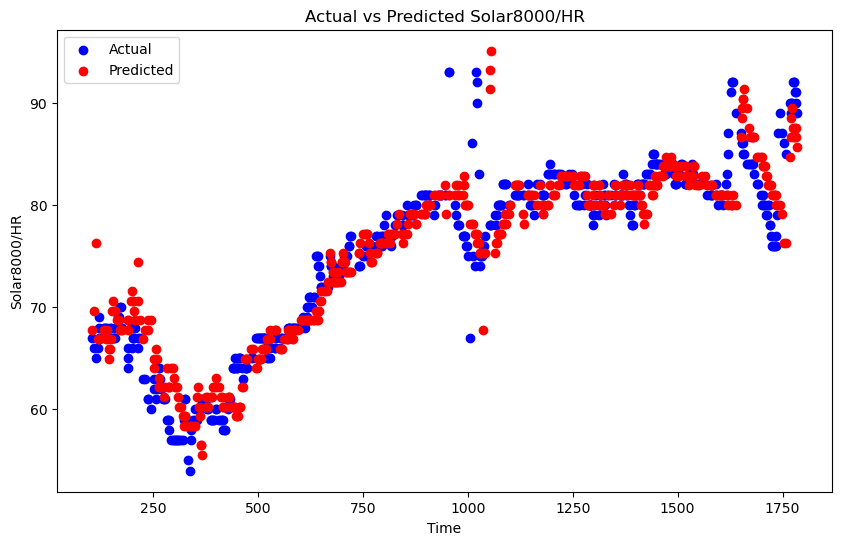

Root Mean Squared Error: 3.350132629848777


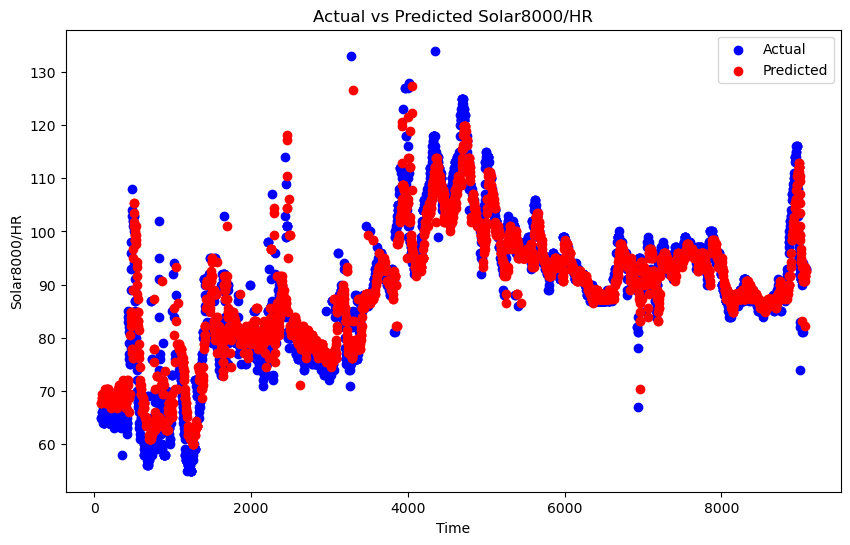

Root Mean Squared Error: 5.961335587351336


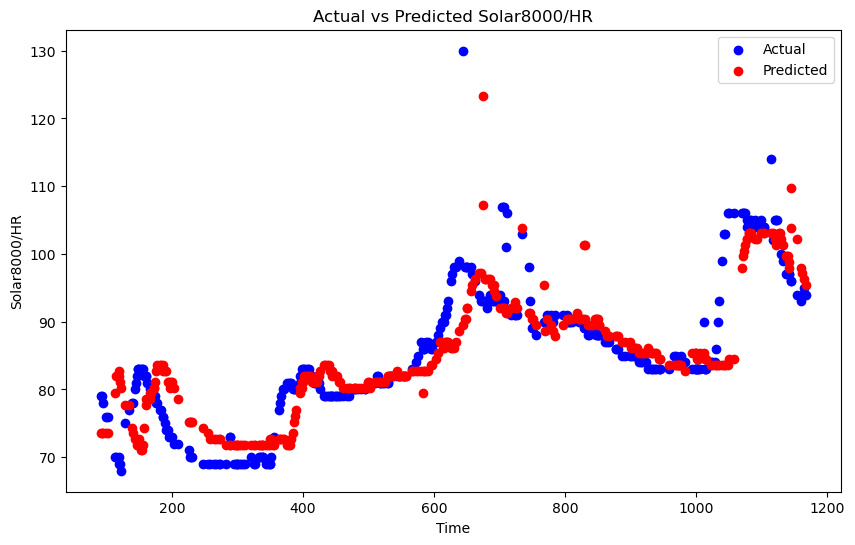

Root Mean Squared Error: 6.0073668304057835


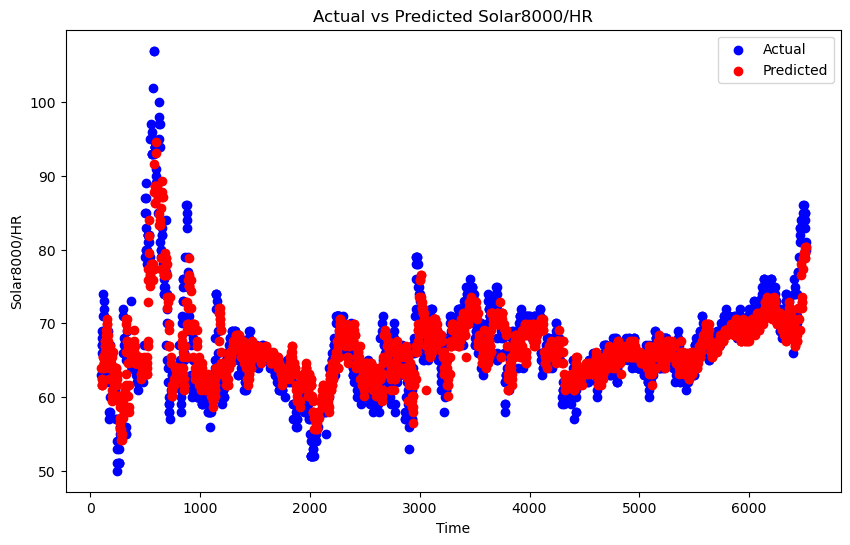

Root Mean Squared Error: 4.154402045493318


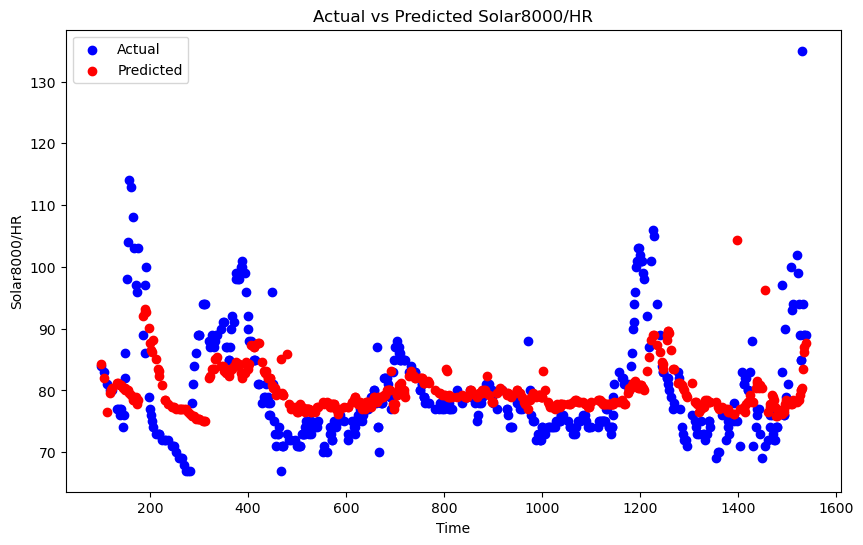

Root Mean Squared Error: 8.346879611602994


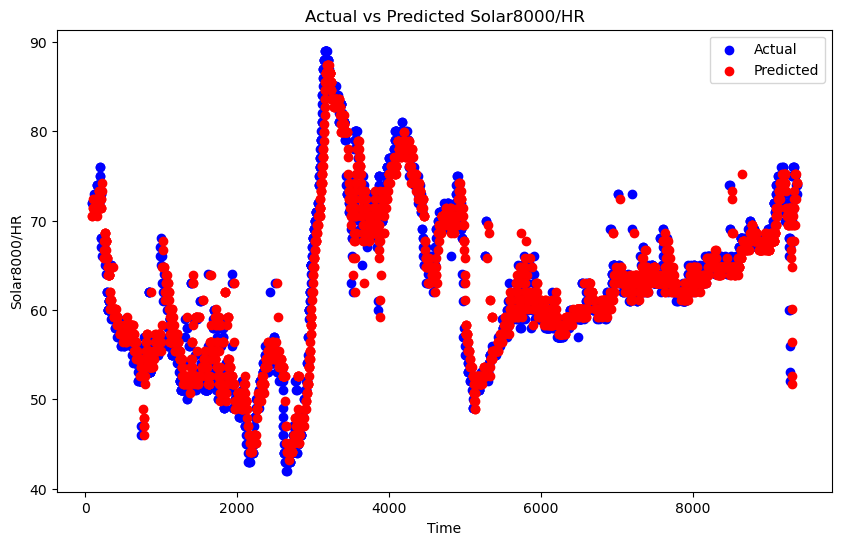

Root Mean Squared Error: 3.0533769522358605


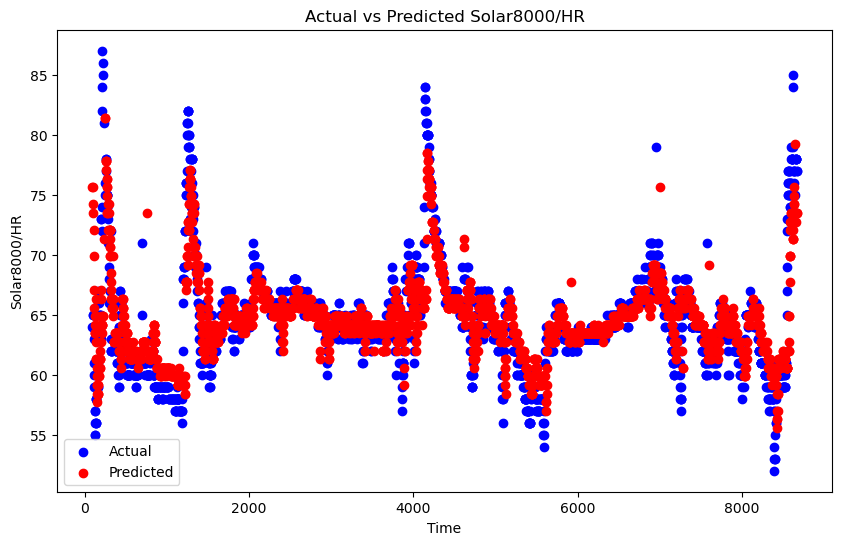

Root Mean Squared Error: 2.887212966660468


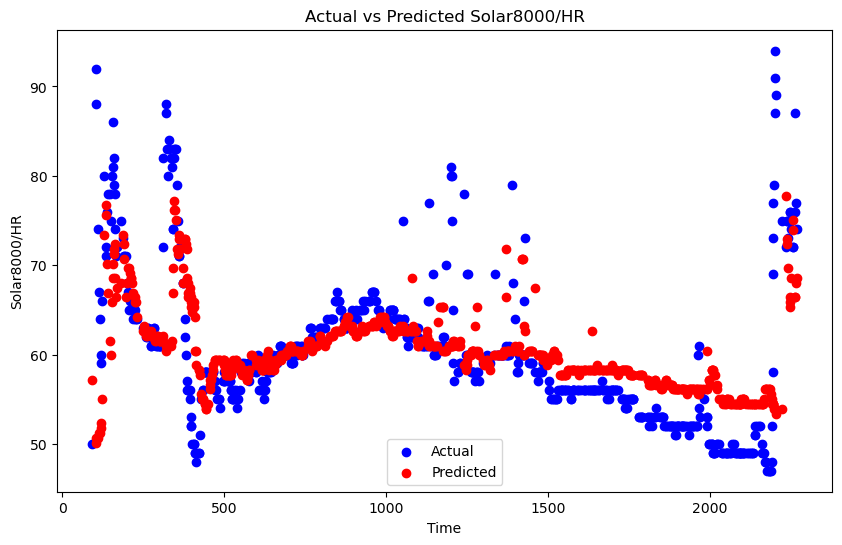

Root Mean Squared Error: 6.769553467245392


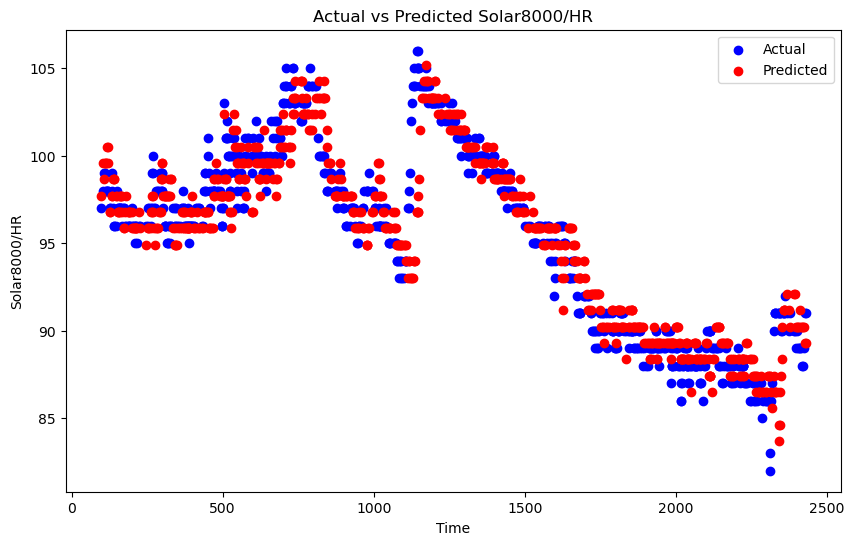

Root Mean Squared Error: 1.9910263026244561


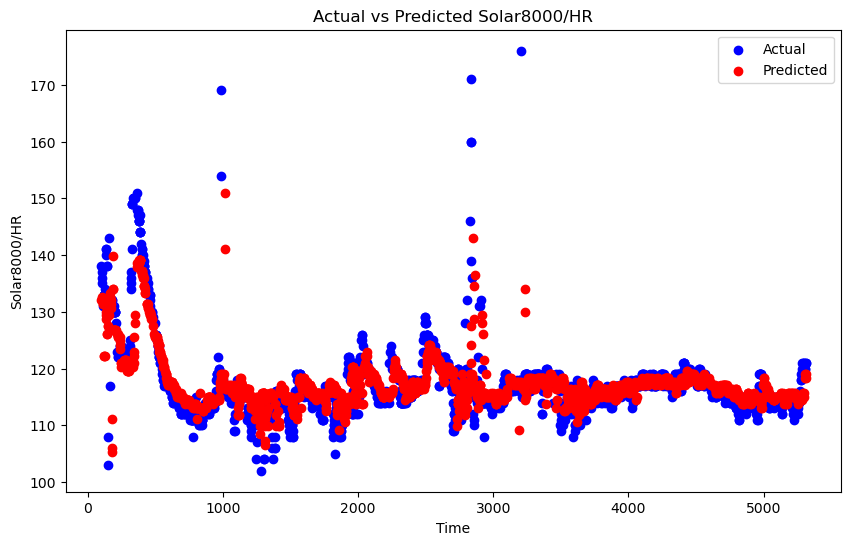

Root Mean Squared Error: 5.190927760295022


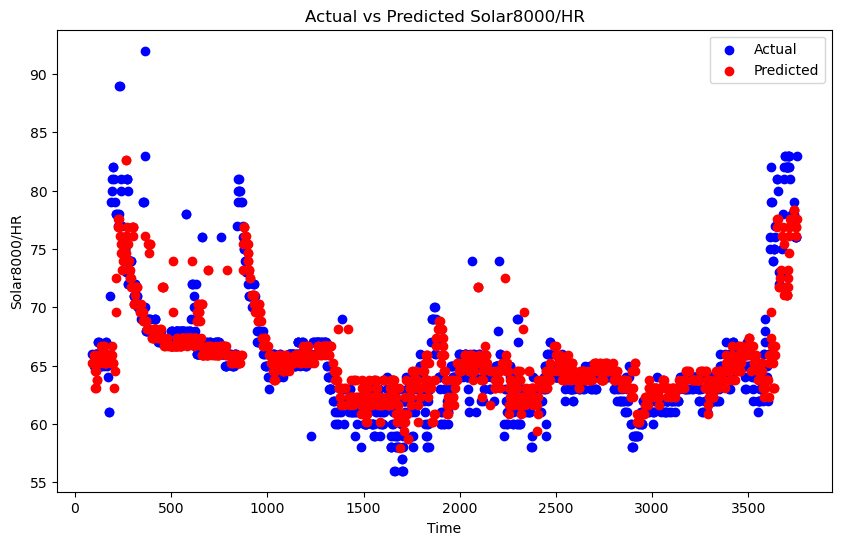

Root Mean Squared Error: 3.5031328876533427


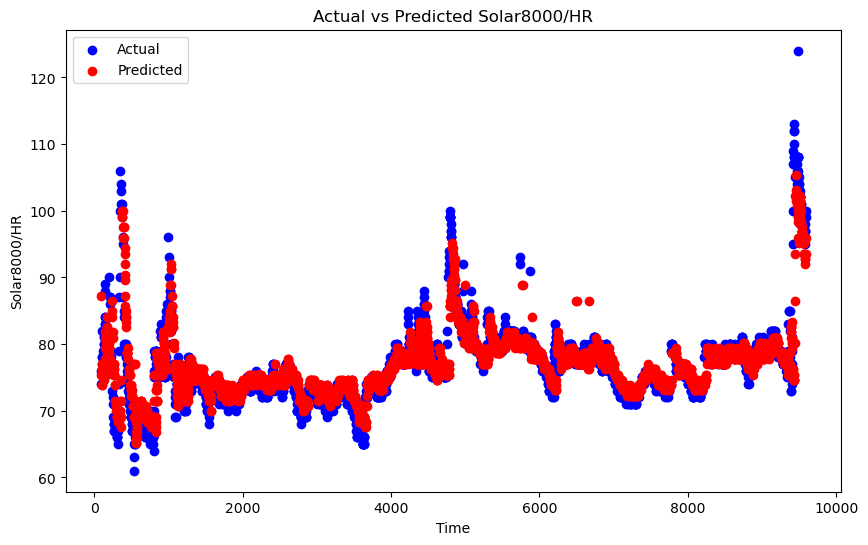

Root Mean Squared Error: 3.7118329159918053


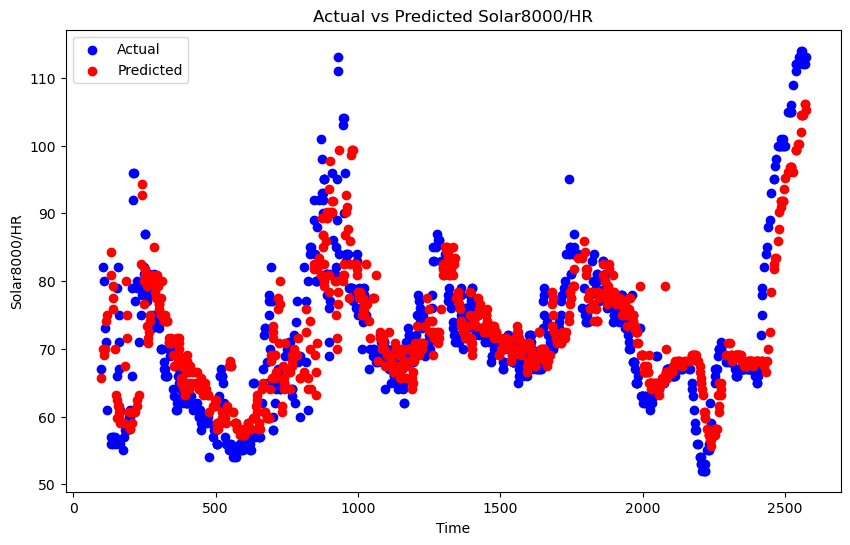

Root Mean Squared Error: 7.634920804880061


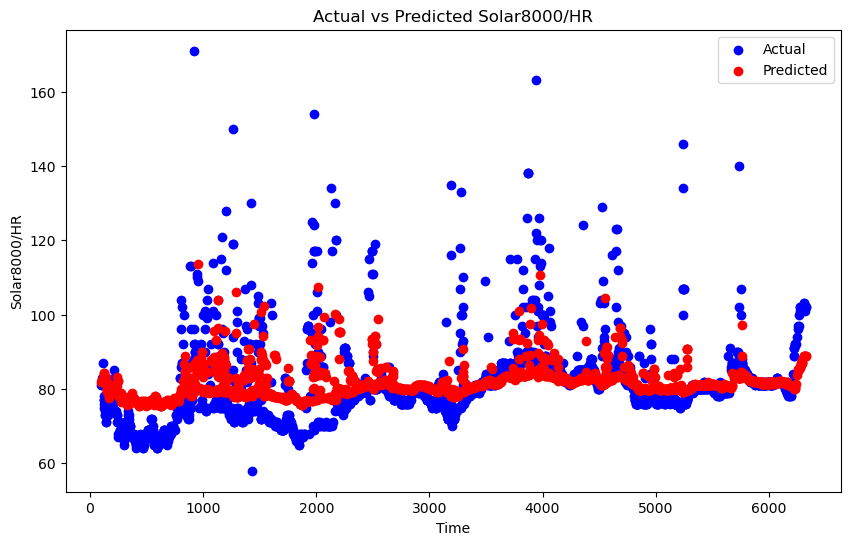

Root Mean Squared Error: 10.559103317287738


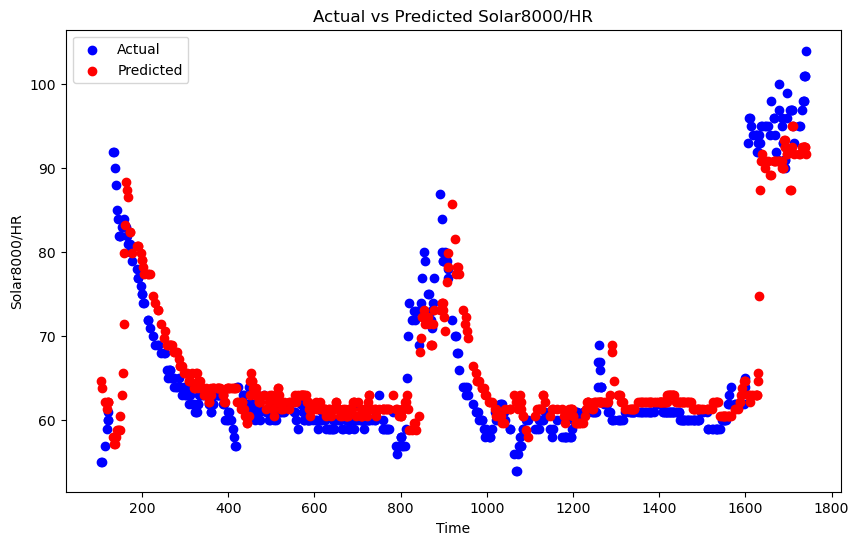

Root Mean Squared Error: 6.898315389078673


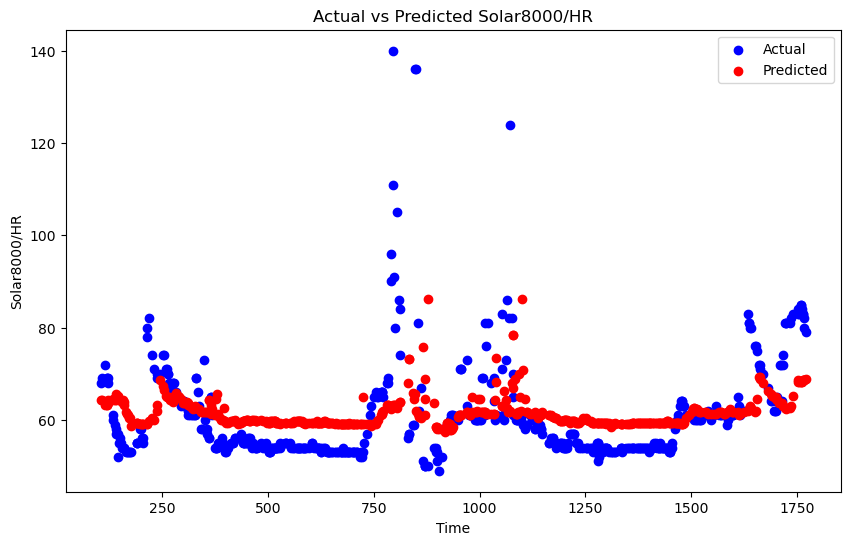

Root Mean Squared Error: 10.145538920919096


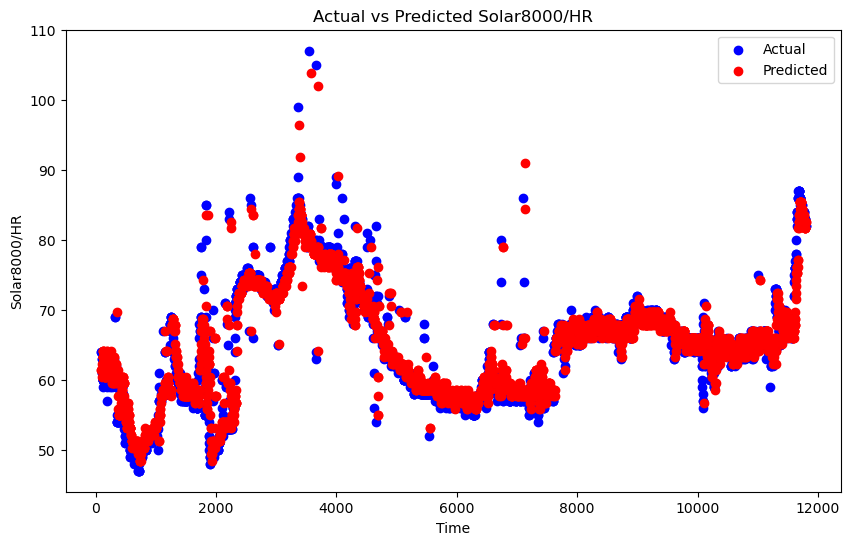

Root Mean Squared Error: 3.4045055251591414


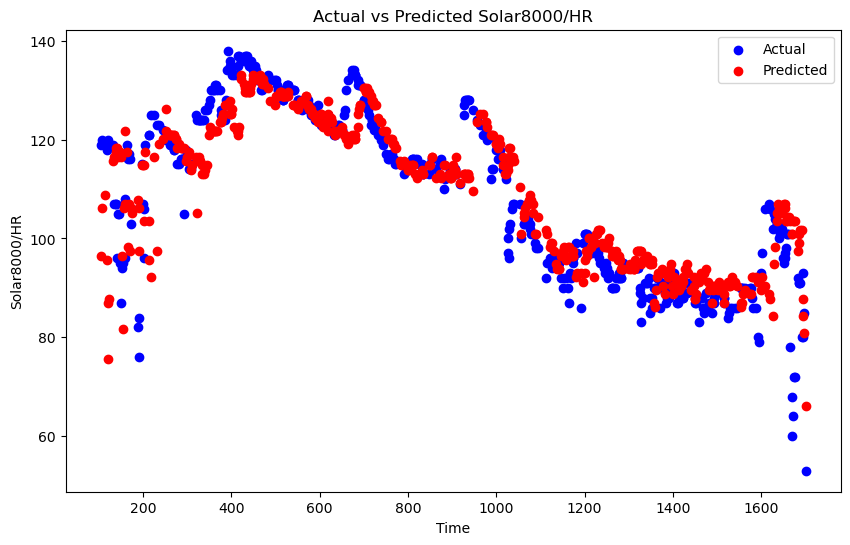

Root Mean Squared Error: 8.507195120294702


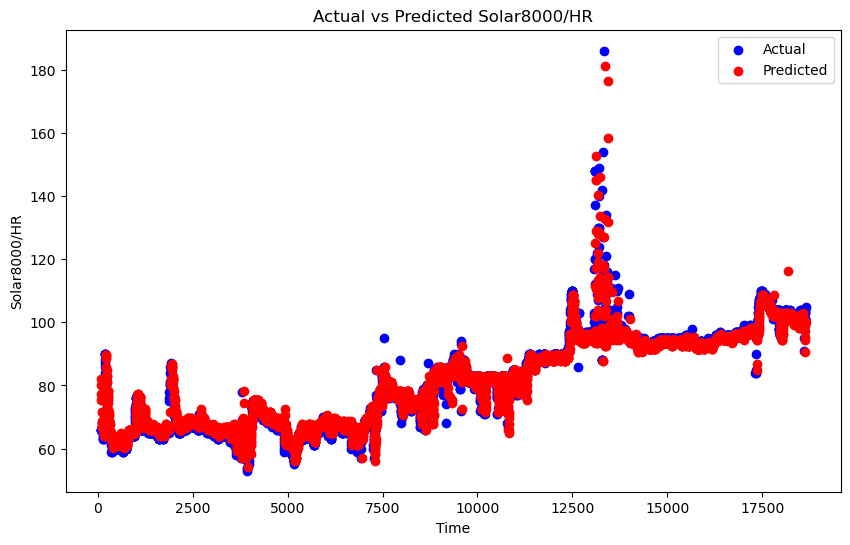

Root Mean Squared Error: 4.631561308342849


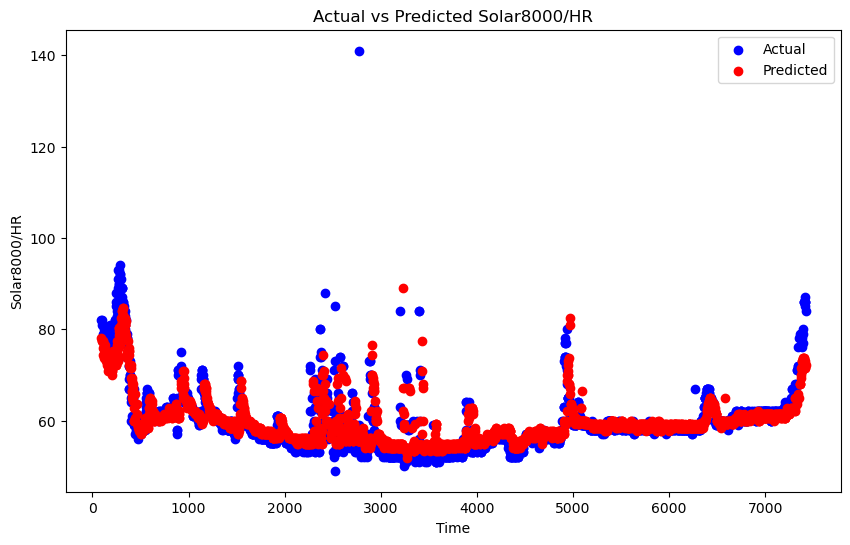

Root Mean Squared Error: 4.611783693709761


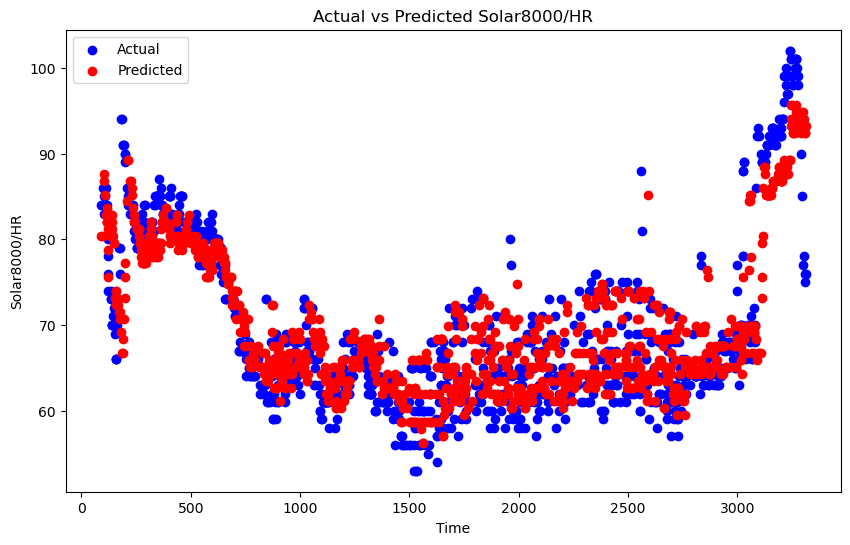

Root Mean Squared Error: 5.939863679970234


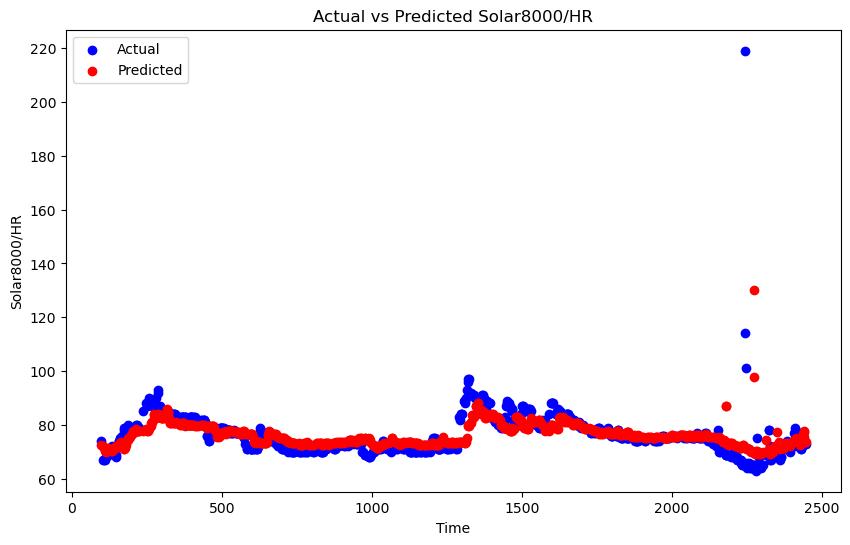

Root Mean Squared Error: 7.303710719902145


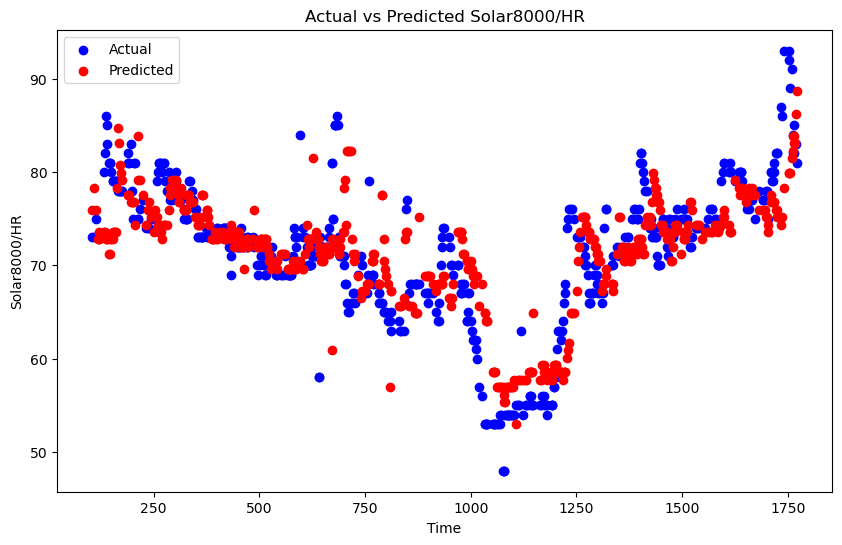

Root Mean Squared Error: 5.076297562449195


In [16]:
train_and_predict_multiple(HRDATA,30)

In [19]:
pd.DataFrame(rmse_list).mean()

0    6.046017
dtype: float64